# Laboratory Session - Exercise 07

 **Alice Pagano** - 1236916 
 
 *Padova, 31 May 2020*

In [1]:
# Import libraries
library(repr) # Library for plot size in jupyter
library(dplyr) # Library for operators
library(latex2exp) # Library for latex text


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



# Index <a class="anchor" id="0"></a>

1. [Exercise 1 - Normal Prior](#1) <br>   
2. [Exercise 2 - Step Prior](#2) <br> 
3. [Exercise 3 - Water quality](#3) <br>

## Exercise 1 - Normal Prior <a class="anchor" id="1"></a>
* [Index](#0)

A researcher has collected $n = 15$ observations that are supposed to come from a Normal distribution with known variance $\sigma^2 = 16$:

obs <- c(26.8,26.3,28.3,28.5,16.3,
         31.9,28.5,27.2,20.9,27.5,
         28.0,18.6,22.3,25.0,31.5)

Assuming a normal prior for $\mu$, $Norm(m = 20, s^2 = 25)$:

### A) determine the posterior distribution $P(\mu|y_1\dots y_{15})$ and find the posterior mean and standard deviation

Given a set of $N$ measurements $D=\{y_i\}$, from Bayes’ theorem: 

$$
P(\mu| D, \sigma) \propto P(D|\mu,\sigma) \times P(\mu|\sigma)
$$

We assume that data are independent, i.e. a measurement of one datum does not interfere on the outcome of another (given $\mu$ and $\sigma$). Hence, the **Likelihood** of the data is:

$$
P(D|\mu\sigma) = \prod_j P(y_j |\mu,\sigma) = \prod_j \frac{1}{\sigma \sqrt{2\pi}} \exp \Big[ \frac{(y_j-\mu)^2}{2 \sigma^2} \Big]
$$

Let us assume our **Prior** has a **Normal** shape with mean $m$ and variance $s^2$, $Norm(m,s^2)$:

$$
G(\mu|m,s) \propto \exp \Big[ - \frac{1}{2s^2} (\mu-m)^2 \Big]
$$

The shape of the **Likelihood** is:

$$
f(y|\mu,\sigma) \propto \exp \Big[ - \frac{1}{2\sigma^2} (y-\mu)^2 \Big]
$$

The product LikelihoodxPrior becomes:

$$
f(y|\mu,\sigma) \times G(\mu|m,s) \propto \exp-\frac{1}{2}\Big[ \frac{(y-\mu)^2}{\sigma^2}+\frac{(\mu-m)^2}{s^2} \Big]
$$

With little algebra, it can be seen that the Posterior is a Normal distribution itself with mean and variance given by:

$$
m' = \frac{\sigma^2 m + s^2 y}{\sigma^2+s^2} \qquad (s')^2 = \frac{\sigma^2 s^2}{\sigma^2 + s^2}
$$

With the definition $\bar{y} = \frac{1}{N} \sum_j y_j $ it is possible to demonstrate that:

$$
m'= \frac{1/s^2}{N/\sigma^2 + 1/s^2} m + \frac{N/\sigma^2}{N/\sigma^2 + 1/s^2} \bar{y} \qquad \frac{1}{(s')^2} = \frac{\sigma^2+Ns^2}{\sigma^2s^2} 
$$

Posterior mean:  25.60102 
Posterior sd  :  1.011443 


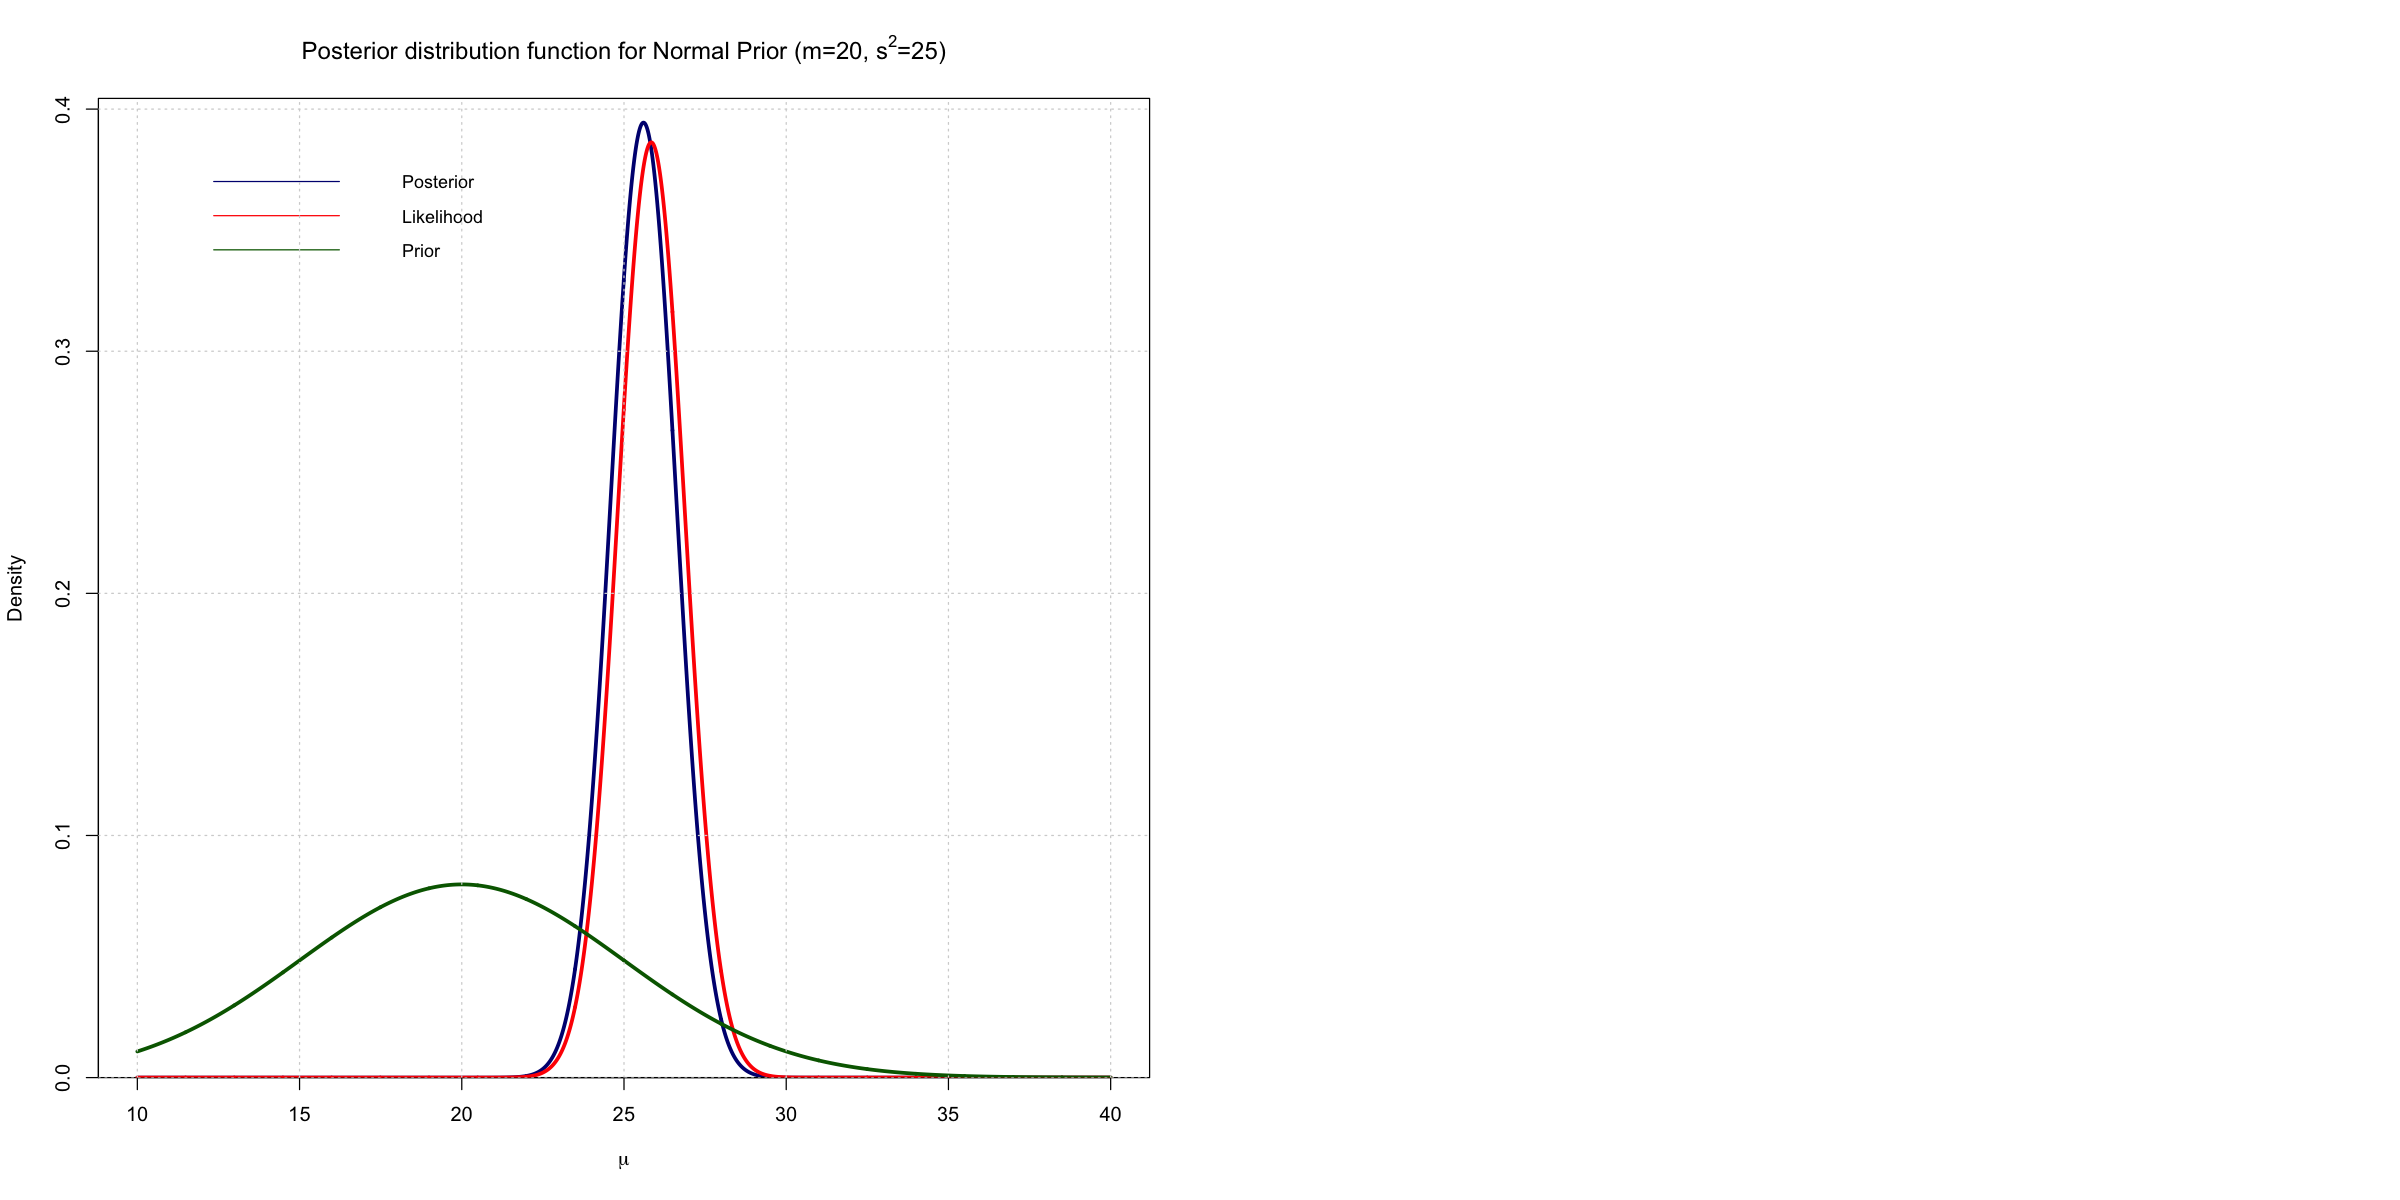

In [2]:
# Observations
obs <- c(26.8,26.3,28.3,28.5,16.3,
         31.9,28.5,27.2,20.9,27.5,
         28.0,18.6,22.3,25.0,31.5)

N <- length(obs)
y.bar <- mean(obs)

sigma.sq <- 16
s.sq <- 25
m <- 20

# Compute mean and sd for the Posterior
mu.post <- (1/s.sq) / (N/sigma.sq + 1/s.sq) * m + (N/sigma.sq) / (N/sigma.sq + 1/s.sq) * y.bar
sd.sq.post <- (sigma.sq * s.sq) / (sigma.sq + N * s.sq)

# Utils
n.sample <- 2000
mu <- seq(10,40,length.out=n.sample)
delta.mu <- mu[2]-mu[1]

# Determine the Prior
norm.prior <- dnorm(mu,mean=m,sd=sqrt(s.sq))

# Determine the Likelihood

like.func <- function(data){
  L <- 1.
  for(x in data){
      L <- L * dnorm(x,mean=mu,sd=sqrt(sigma.sq))
  }
  return(L)
}

norm.like <- like.func(obs)
norm.like <- norm.like/(delta.mu*sum(norm.like))

# Determine the Posterior 
norm.post <- dnorm(mu,mean=mu.post,sd=sqrt(sd.sq.post))

# Normalize Posterior
# (we renormalize the posterior because the Prior is 0 outside the interval of mu, while the Posterior is normalized in -inf,+inf)
norm.post <- norm.post/(delta.mu*sum(norm.post))

cat("Posterior mean: ",mu.post,'\n')
cat("Posterior sd  : ",sqrt(sd.sq.post),'\n')

# Plot of the Posterior for uniform prior
# set the size and position of the plots
par(mfrow=c(1,2))
options(repr.plot.width=20, repr.plot.height=10)

plot(mu, norm.post, xaxs='r', yaxs='i', col='navy', type='l', ylim=c(0,max(norm.post)+0.01), 
     main = TeX(sprintf("Posterior distribution function for Normal Prior (m=20,$s^2$=25)")), lty=1, lwd = 3, xlab=TeX(sprintf("$\\mu$")), 
     ylab='Density')

lines(mu,norm.like, xaxs='r', yaxs='i', col='red', type='l',lty=1, lwd = 3)
lines(mu,norm.prior, xaxs='r', yaxs='i', col='darkgreen', type='l',lty=1, lwd = 3)

legend("topleft", inset=0.05,legend=c("Posterior","Likelihood","Prior"),
       col=c("navy","red","darkgreen"), lty=c(1,1,1), cex=0.9,box.lty=0)
grid()



### B) find the 95% credibility interval for $\mu$

In [3]:
# Evaluate 95% credibility interval for Normal Posterior 

norm.area <- delta.mu*cumsum(norm.post)

cl = 0.95 # Confidence level

cl.func <- function(p,cumsum.area,cl) {
            x1 <- NULL
            x2 <- NULL
            for(i in 1:(length(cumsum.area)-1)){
                cl1 <- (1-cl)/2
                cl2 <- cl+(1-cl)/2
                if ( (cumsum.area[i+1]>= cl1) & (cumsum.area[i] <= cl1)) {
                    x1 <- (p[i]+p[i+1])/2
                }
                if ( (cumsum.area[i+1]>= cl2) & (cumsum.area[i] <= cl2)) {
                    x2 <- (p[i]+p[i+1])/2
                }            
            }
            return(c(x1,x2))
           }

x.norm <- cl.func(mu,norm.area,cl)

cat("Normal Posterior (Normal Prior)  :\t", 'x1=', x.norm[1],'\tx2=', x.norm[2],'\n')

Normal Posterior (Normal Prior)  :	 x1= 23.6043 	x2= 27.58129 


### C) plot the posterior distribution, indicating on the same plot: the mean value, the standard deviation, and the 95% credibility interval

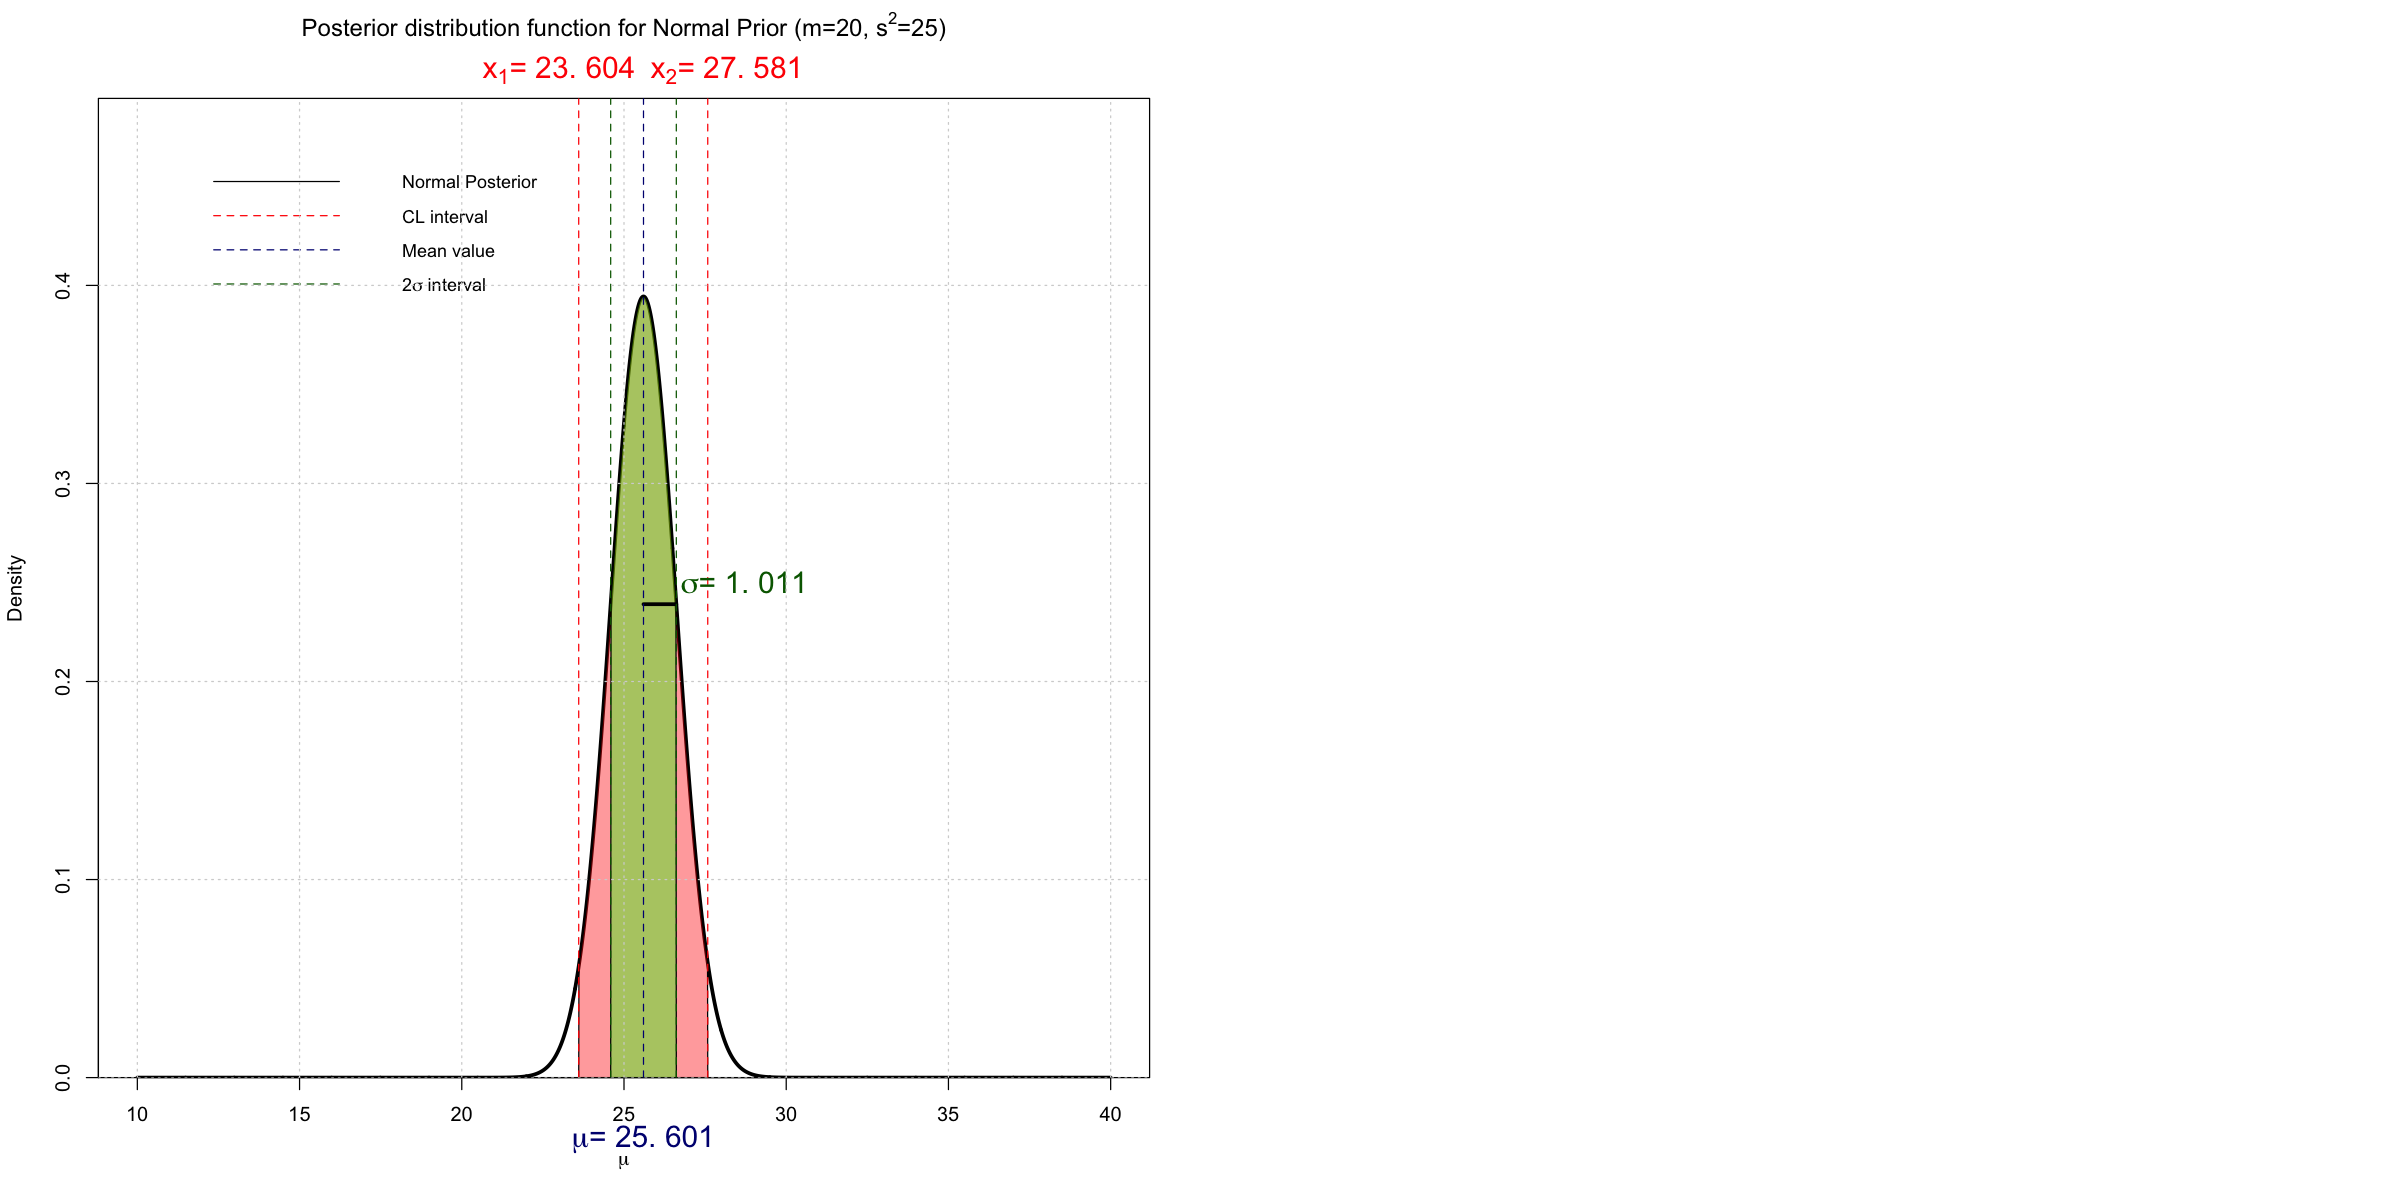

In [4]:
# set the size and position of the plots
par(mfrow=c(1,2))
options(repr.plot.width=20, repr.plot.height=10)

# Normal Posterior
plot(mu, norm.post, xaxs='r', yaxs='i', col='black', type='l', ylim=c(0,max(norm.post)+0.1),
     lty=1, lwd = 3, xlab=TeX(sprintf("$\\mu$")), ylab='Density')

title(TeX(sprintf("Posterior distribution function for Normal Prior (m=20,$s^2$=25)")),line=3)
x = x.norm

xp <- c(x[1],mu[mu>x[1] & mu<x[2]],x[2])
yp <- c(0,norm.post[which(mu>x[1] & mu<x[2])],0)
polygon(x = xp, y = yp, col = rgb(red = 1, green = 0, blue = 0, alpha = 0.4))

xsd = c(mu.post-sqrt(sd.sq.post),mu.post+sqrt(sd.sq.post))

xp <- c(xsd[1],mu[mu>xsd[1] & mu<xsd[2]],xsd[2])
yp <- c(0,norm.post[which(mu>xsd[1] & mu<xsd[2])],0)
polygon(x = xp, y = yp, col = rgb(red = 0, green = 1, blue = 0, alpha = 0.4))

# Plot sigma
xp <- c(mu.post,mu.post+sqrt(sd.sq.post))
yp <- c(norm.post[which(mu>=xsd[2] & mu<=xsd[2]+0.01)],norm.post[which(mu>=xsd[2] & mu<=xsd[2]+0.01)])
polygon(x = xp, y = yp, col = 'red',lwd=3)

abline(v=x[1], lty=2,col='red',lwd=1)
abline(v=x[2], lty=2,col='red',lwd=1)
abline(v=mu.post, lty=2,col='navy',lwd=1)
abline(v=mu.post+sqrt(sd.sq.post), lty=2,col='darkgreen',lwd=1)
abline(v=mu.post-sqrt(sd.sq.post), lty=2,col='darkgreen',lwd=1)

text(x[1]-0.6, par("usr")[4] + 0.025, labels = TeX(sprintf("$x_1$= %0.3f",x[1])), pos=1, cex=1.5, col="red", xpd=TRUE)
text(x[2]+0.6, par("usr")[4] + 0.025, labels = TeX(sprintf("$x_2$= %0.3f",x[2])), pos=1, cex=1.5, col="red", xpd=TRUE)
text(mu.post, par("usr")[3] - 0.02 , labels = TeX(sprintf("$\\mu$= %0.3f",mu.post)), pos=1, cex=1.5, col="navy", xpd=TRUE)
text(mu.post+2.1+sqrt(sd.sq.post), par("usr")[3] + 0.26 , labels = TeX(sprintf("$\\sigma$= %0.3f",sqrt(sd.sq.post))), pos=1, cex=1.5, col="darkgreen", xpd=TRUE)

legend("topleft", inset=0.05,legend=c("Normal Posterior","CL interval","Mean value",TeX(sprintf("2$\\sigma$ interval"))),
       col=c("black","red","navy","darkgreen"), lty=c(1,2,2,2), cex=0.9,box.lty=0)

grid()

In [5]:
# Save important variables for the plots
norm1.post <- norm.post
x1.norm <- x.norm
mu1.post <- mu.post
sd1.sq.post <- sd.sq.post

### D) repeat the analysis using a different prior $Norm(m = 30, s^2 = 16)$ and plot, on the same graph, the likelihood, the prior and the posterior.

Posterior mean:  26.1 
Posterior sd  :  1 


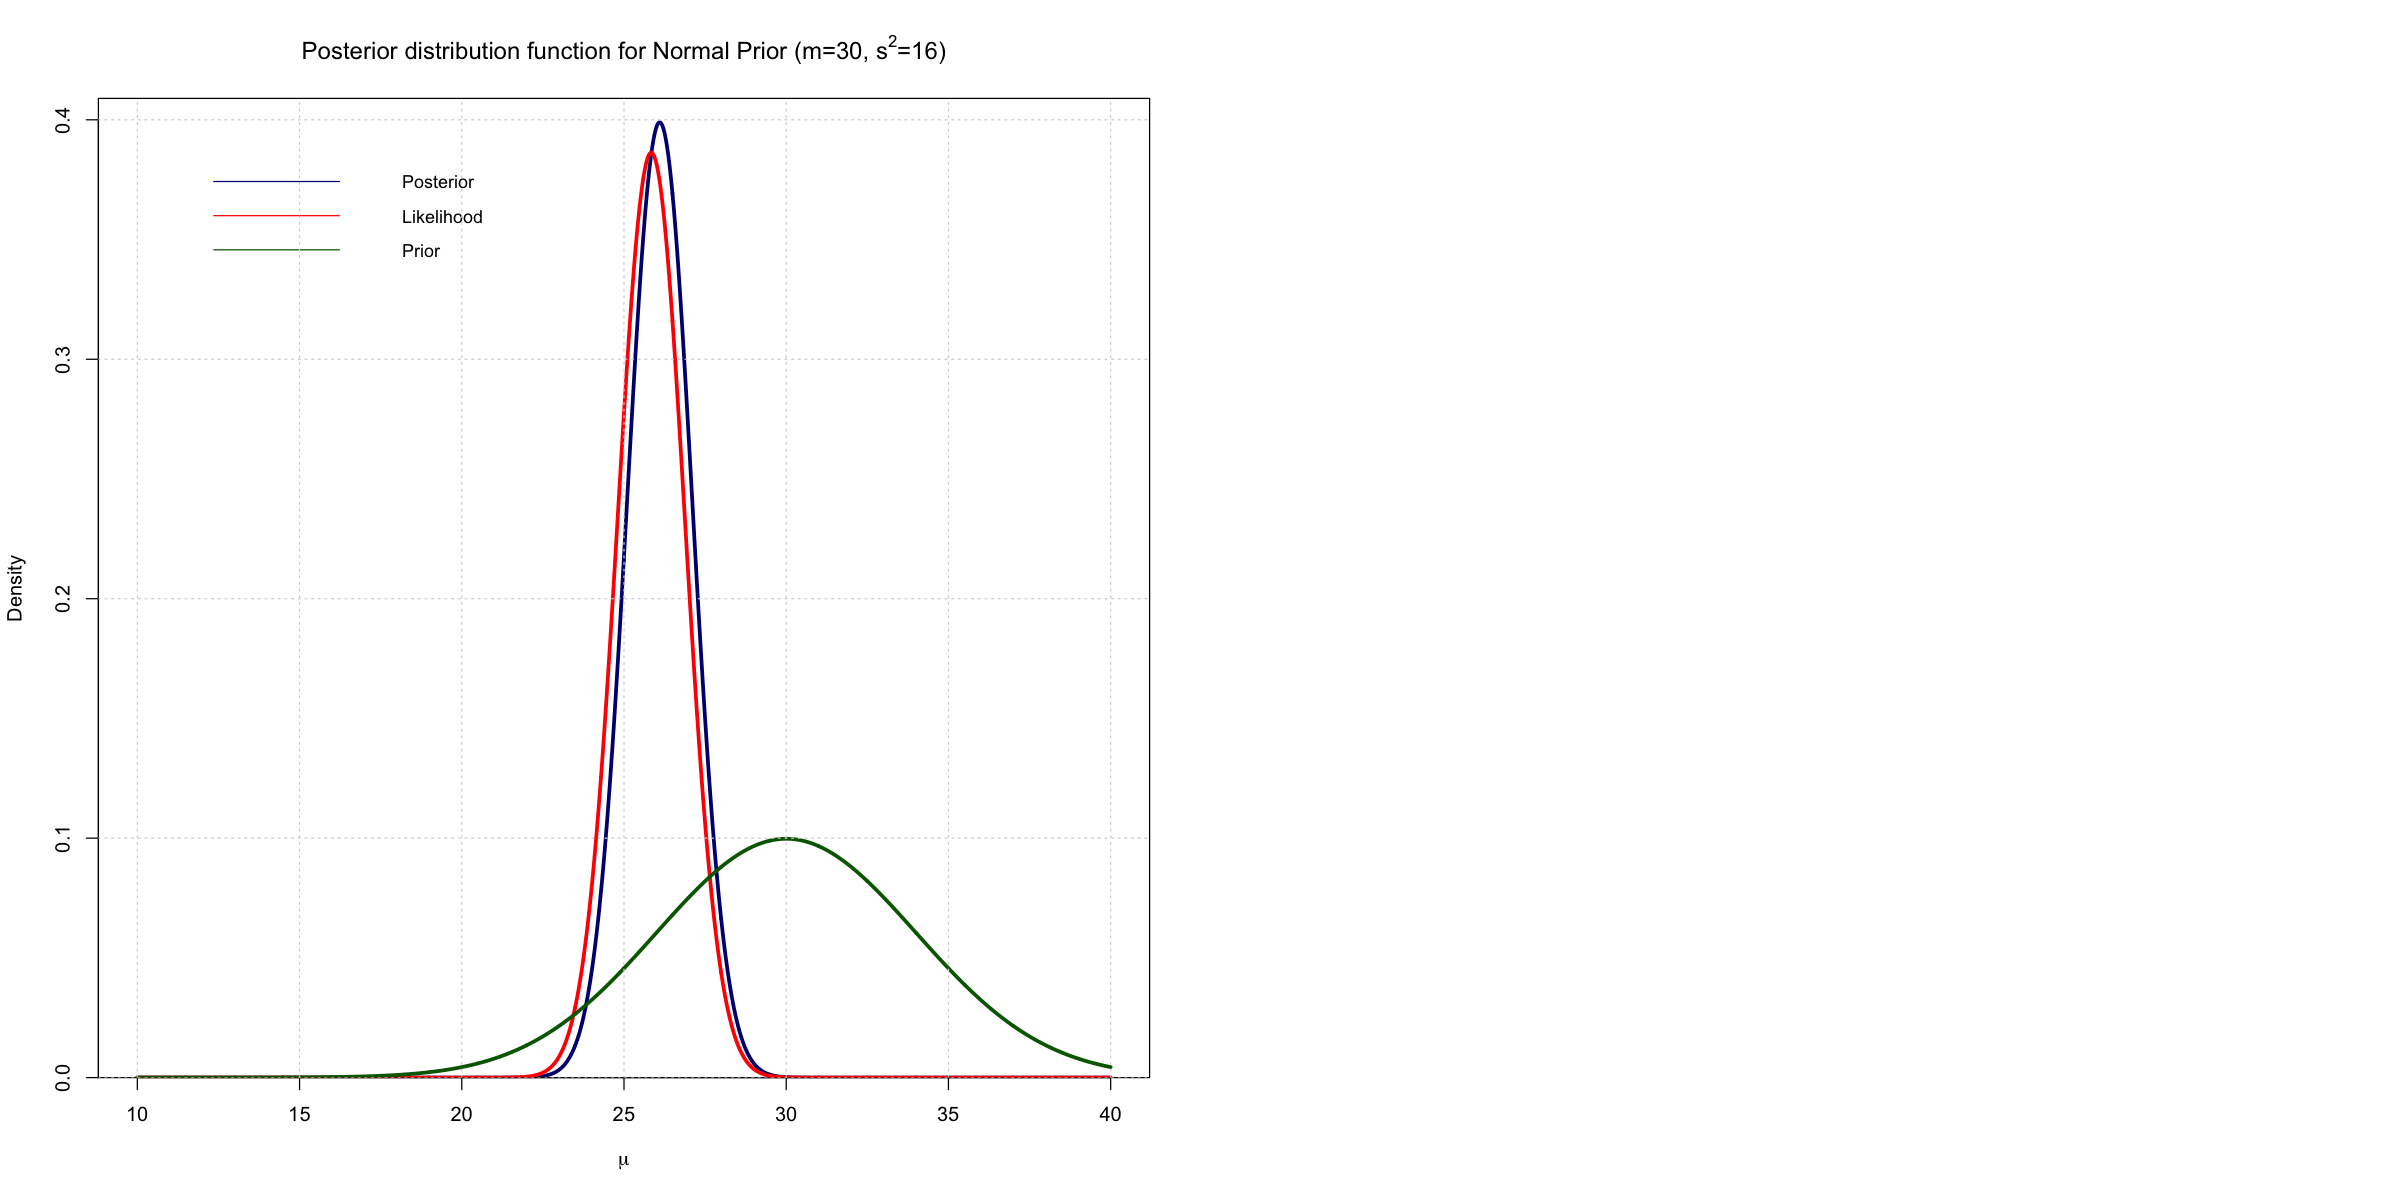

In [6]:
# Observations
obs <- c(26.8,26.3,28.3,28.5,16.3,
         31.9,28.5,27.2,20.9,27.5,
         28.0,18.6,22.3,25.0,31.5)

N <- length(obs)
y.bar <- mean(obs)

sigma.sq <- 16
s.sq <- 16
m <- 30

# Compute mean and sd for the Posterior
mu.post <- (1/s.sq) / (N/sigma.sq + 1/s.sq) * m + (N/sigma.sq) / (N/sigma.sq + 1/s.sq) * y.bar
sd.sq.post <- (sigma.sq * s.sq) / (sigma.sq + N * s.sq)

# Utils
n.sample <- 2000
mu <- seq(10,40,length.out=n.sample)
delta.mu <- mu[2]-mu[1]

# Determine the Prior
norm.prior <- dnorm(mu,mean=m,sd=sqrt(s.sq))

# Determine the Likelihood

like.func <- function(data){
  L <- 1.
  for(x in data){
      L <- L * dnorm(x,mean=mu,sd=sqrt(sigma.sq))
  }
  return(L)
}

norm.like <- like.func(obs)
norm.like <- norm.like/(delta.mu*sum(norm.like))

# Determine the Posterior 
norm.post <- dnorm(mu,mean=mu.post,sd=sqrt(sd.sq.post))

# Normalize Posterior
# (we renormalize the posterior because the Prior is 0 outside the interval of mu, while the Posterior is normalized in -inf,+inf)
norm.post <- norm.post/(delta.mu*sum(norm.post))

cat("Posterior mean: ",mu.post,'\n')
cat("Posterior sd  :\ ",sqrt(sd.sq.post),'\n')

# Plot of the Posterior for uniform prior
# set the size and position of the plots
par(mfrow=c(1,2))
options(repr.plot.width=20, repr.plot.height=10)

plot(mu, norm.post, xaxs='r', yaxs='i', col='navy', type='l', ylim=c(0,max(norm.post)+0.01), 
     main = TeX(sprintf("Posterior distribution function for Normal Prior (m=30,$s^2$=16)")), lty=1, lwd = 3, xlab=TeX(sprintf("$\\mu$")), 
     ylab='Density')

lines(mu,norm.like, xaxs='r', yaxs='i', col='red', type='l',lty=1, lwd = 3)
lines(mu,norm.prior, xaxs='r', yaxs='i', col='darkgreen', type='l',lty=1, lwd = 3)

legend("topleft", inset=0.05,legend=c("Posterior","Likelihood","Prior"),
       col=c("navy","red","darkgreen"), lty=c(1,1,1), cex=0.9,box.lty=0)
grid()


In [7]:
# Evaluate 95% credibility interval for Normal Posterior 

norm.area <- delta.mu*cumsum(norm.post)

cl = 0.95 # Confidence level

cl.func <- function(p,cumsum.area,cl) {
            x1 <- NULL
            x2 <- NULL
            for(i in 1:(length(cumsum.area)-1)){
                cl1 <- (1-cl)/2
                cl2 <- cl+(1-cl)/2
                if ( (cumsum.area[i+1]>= cl1) & (cumsum.area[i] <= cl1)) {
                    x1 <- (p[i]+p[i+1])/2
                }
                if ( (cumsum.area[i+1]>= cl2) & (cumsum.area[i] <= cl2)) {
                    x2 <- (p[i]+p[i+1])/2
                }            
            }
            return(c(x1,x2))
           }

x.norm <- cl.func(mu,norm.area,cl)

cat("Normal Posterior (Normal Prior)  :\t", 'x1=', x.norm[1],'\tx2=', x.norm[2],'\n')

Normal Posterior (Normal Prior)  :	 x1= 24.12956 	x2= 28.04652 


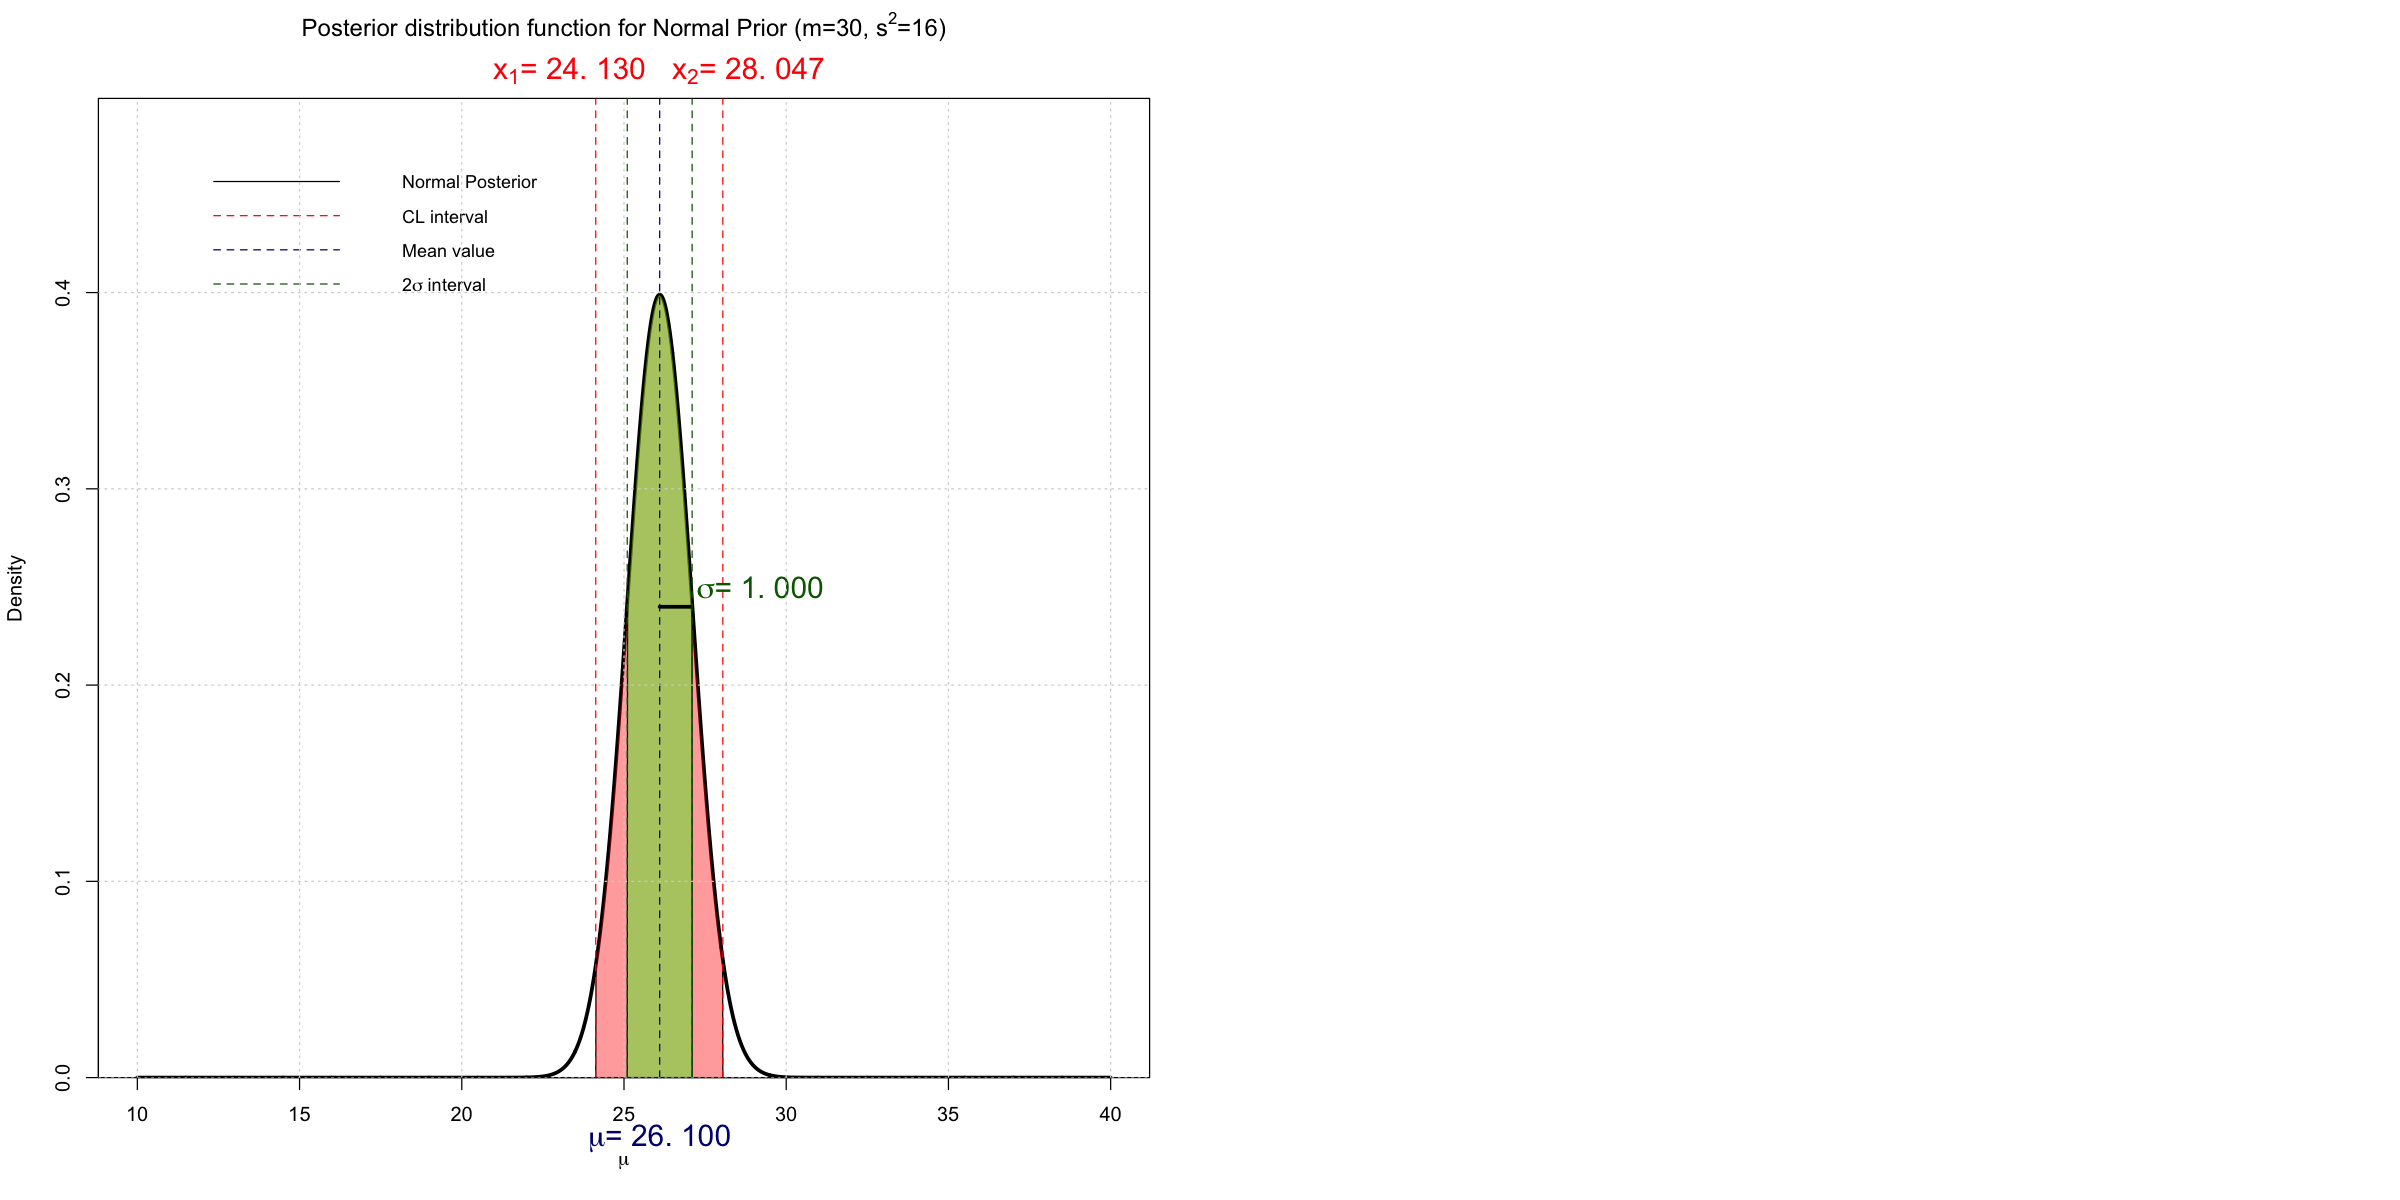

In [8]:
# set the size and position of the plots
par(mfrow=c(1,2))
options(repr.plot.width=20, repr.plot.height=10)

# Normal Posterior
plot(mu, norm.post, xaxs='r', yaxs='i', col='black', type='l', ylim=c(0,max(norm.post)+0.1),
     lty=1, lwd = 3, xlab=TeX(sprintf("$\\mu$")), ylab='Density')

title(TeX(sprintf("Posterior distribution function for Normal Prior (m=30,$s^2$=16)")),line=3)
x = x.norm

xp <- c(x[1],mu[mu>x[1] & mu<x[2]],x[2])
yp <- c(0,norm.post[which(mu>x[1] & mu<x[2])],0)
polygon(x = xp, y = yp, col = rgb(red = 1, green = 0, blue = 0, alpha = 0.4))

xsd = c(mu.post-sqrt(sd.sq.post),mu.post+sqrt(sd.sq.post))

xp <- c(xsd[1],mu[mu>xsd[1] & mu<xsd[2]],xsd[2])
yp <- c(0,norm.post[which(mu>xsd[1] & mu<xsd[2])],0)
polygon(x = xp, y = yp, col = rgb(red = 0, green = 1, blue = 0, alpha = 0.4))

# Plot sigma
xp <- c(mu.post,mu.post+sqrt(sd.sq.post))
yp <- c(norm.post[which(mu>=xsd[2] & mu<=xsd[2]+0.01)],norm.post[which(mu>=xsd[2] & mu<=xsd[2]+0.01)])
polygon(x = xp, y = yp, col = 'red',lwd=3)

abline(v=x[1], lty=2,col='red')
abline(v=x[2], lty=2,col='red')
abline(v=mu.post, lty=2,col='navy')
abline(v=mu.post+sqrt(sd.sq.post), lty=2,col='darkgreen')
abline(v=mu.post-sqrt(sd.sq.post), lty=2,col='darkgreen')

text(x[1]-0.8, par("usr")[4] + 0.025, labels = TeX(sprintf("$x_1$= %0.3f",x[1])), pos=1, cex=1.5, col="red", xpd=TRUE)
text(x[2]+0.8, par("usr")[4] + 0.025, labels = TeX(sprintf("$x_2$= %0.3f",x[2])), pos=1, cex=1.5, col="red", xpd=TRUE)
text(mu.post, par("usr")[3] - 0.02 , labels = TeX(sprintf("$\\mu$= %0.3f",mu.post)), pos=1, cex=1.5, col="navy", xpd=TRUE)
text(mu.post+2.1+sqrt(sd.sq.post), par("usr")[3] + 0.26 , labels = TeX(sprintf("$\\sigma$= %0.3f",sqrt(sd.sq.post))), pos=1, cex=1.5, col="darkgreen", xpd=TRUE)

legend("topleft", inset=0.05,legend=c("Normal Posterior","CL interval","Mean value",TeX(sprintf("2$\\sigma$ interval"))),
       col=c("black","red","navy","darkgreen"), lty=c(1,2,2,2), cex=0.9,box.lty=0)

grid()

In [9]:
# Save important variables for the plots
norm2.post <- norm.post
x2.norm <- x.norm
mu2.post <- mu.post
sd2.sq.post <- sd.sq.post

### E) compare the credibility intervals obtained with the two priors


Normal Posterior with Normal Prior m=20, s^2=25  :	 x1= 23.6043 	x2= 27.58129 
Normal Posterior with Normal Prior m=30, s^2=16  :	 x1= 24.12956 	x2= 28.04652 


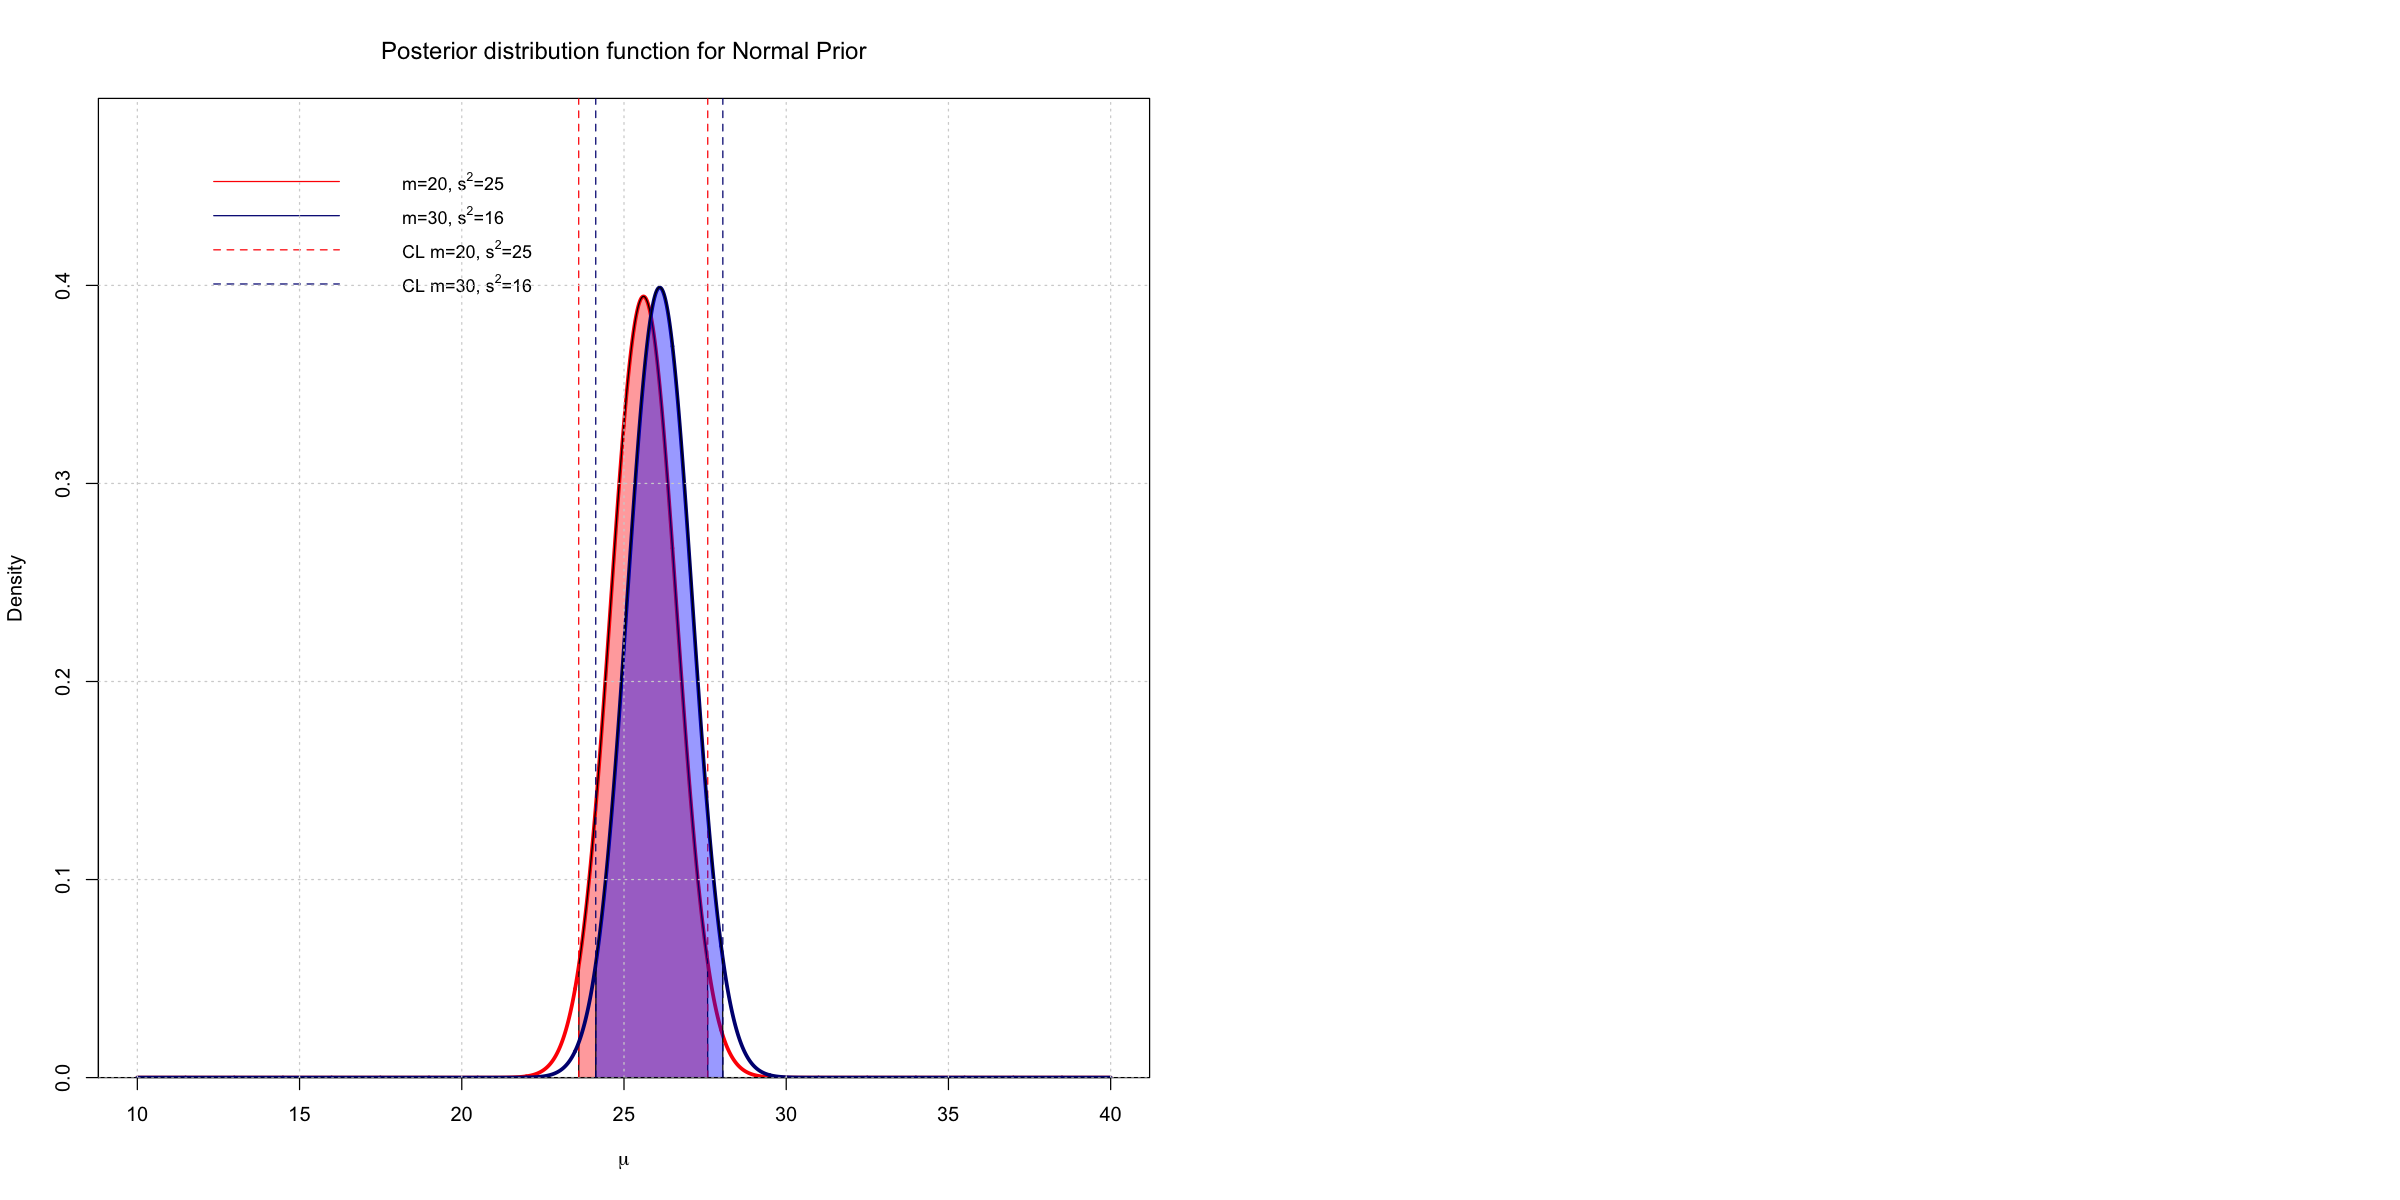

In [10]:
# set the size and position of the plots
par(mfrow=c(1,2))
options(repr.plot.width=20, repr.plot.height=10)


cat("Normal Posterior with Normal Prior m=20, s^2=25  :\t", 'x1=', x1.norm[1],'\tx2=', x1.norm[2],'\n')
cat("Normal Posterior with Normal Prior m=30, s^2=16  :\t", 'x1=', x2.norm[1],'\tx2=', x2.norm[2],'\n')


# Normal Posterior 1
plot(mu, norm1.post, xaxs='r', yaxs='i', col='red', type='l', ylim=c(0,max(norm1.post)+0.1),
     lty=1, lwd = 3, xlab=TeX(sprintf("$\\mu$")), ylab='Density')

title(TeX(sprintf("Posterior distribution function for Normal Prior")),line=2)
x = x1.norm

xp <- c(x[1],mu[mu>x[1] & mu<x[2]],x[2])
yp <- c(0,norm1.post[which(mu>x[1] & mu<x[2])],0)
polygon(x = xp, y = yp, col = rgb(red = 1, green = 0, blue = 0, alpha = 0.4))

abline(v=x[1], lty=2,col='red')
abline(v=x[2], lty=2,col='red')

# Normal Posterior 2
lines(mu, norm2.post, xaxs='r', yaxs='i', col='navy', type='l', lty=1, lwd = 3)
x = x2.norm

xp <- c(x[1],mu[mu>x[1] & mu<x[2]],x[2])
yp <- c(0,norm2.post[which(mu>x[1] & mu<x[2])],0)
polygon(x = xp, y = yp, col = rgb(red = 0, green = 0, blue = 1, alpha = 0.4))

abline(v=x[1], lty=2,col='navy')
abline(v=x[2], lty=2,col='navy')

legend("topleft", inset=0.05,legend=c(TeX(sprintf("m=20,$s^2$=25")) ,TeX(sprintf("m=30,$s^2$=16")),TeX(sprintf("CL m=20,$s^2$=25")),TeX(sprintf("CL m=30,$s^2$=16"))),
       col=c("red","navy","red","navy"), lty=c(1,1,2,2), cex=0.9,box.lty=0)

grid()

## Exercise 2 - Step Prior <a class="anchor" id="2"></a>
* [Index](#0)

A researcher has collected $n = 16$ observations that are supposed to come from a Normal distribution with known variance $\sigma^2 = 4$:

obs <- c(4.09 4.68 1.87 2.62 5.58 8.68 4.07 4.78 4.79 4.49 5.85 5.09 2.40 6.27 6.30 4.47)

Assuming the prior is a step funtion:

$$
g(\mu) = 
\begin{cases}
\mu   & \text{for } 0 < \mu \le 3 \\
3     & \text{for } 3 < \mu \le 5 \\
8-\mu & \text{for } 5 < \mu \le 8 \\
0     & \text{for } \mu > 8
\end{cases}
$$

### A) find the posterior distribution, the posterior mean and standard deviation

In [11]:
# Observations
obs <- c(4.09, 4.68, 1.87, 2.62, 5.58, 8.68, 4.07, 
         4.78, 4.79, 4.49, 5.85, 5.09, 2.40, 6.27,
         6.30, 4.47)

N <- length(obs)
y.bar <- mean(obs)

sigma.sq <- 4

# Utils
n.sample <- 2000
mu <- seq(0.000001,10,length.out=n.sample)
delta.mu <- mu[2]-mu[1]

# Determine the Prior
prior.func <- function(mu.data){
                  mu.list <- c(NULL)
                  for(mu in mu.data){
                      if(0<mu & mu<=3){mu.list <- c(mu.list,mu)}
                      if(3<mu & mu<=5){mu.list <- c(mu.list,3)}
                      if(5<mu & mu<=8){mu.list <- c(mu.list,8-mu)}
                      if(mu>8){mu.list <- c(mu.list,0)}                 
                  }
                  return(mu.list) 
              } 

step.prior <- prior.func(mu)
step.prior <- step.prior/(delta.mu*sum(step.prior))

# Determine the Likelihood

like.func <- function(data){
  L <- 1.
  for(x in data){
      L <- L * dnorm(x,mean=mu,sd=sqrt(sigma.sq))
  }
  return(L)
}

norm.like <- like.func(obs)
norm.like <- norm.like/(delta.mu*sum(norm.like))

# Determine the Posterior 
norm.post <- norm.like * step.prior

# Normalize Posterior
# (I renormalize the posterior because the Prior is 0 outside the interval of mu, while the Posterior is normalized in -inf,+inf)
norm.post <- norm.post/(delta.mu*sum(norm.post))

# Compute mean and variance
mu.post <-  delta.mu*sum(mu*norm.post)
sd.sq.post <- delta.mu*sum((mu**2)*norm.post) - (delta.mu*sum(mu*norm.post))**2

cat("Posterior mean: ",mu.post,'\n')
cat("Posterior sd  : ",sqrt(sd.sq.post),'\n')


Posterior mean:  4.725187 
Posterior sd  :  0.4837868 


### B) find the 95% credibility interval for $\mu$

In [12]:
# Evaluate 95% credibility interval for Normal Posterior 

norm.area <- delta.mu*cumsum(norm.post)

cl = 0.95 # Confidence level

cl.func <- function(p,cumsum.area,cl) {
            x1 <- NULL
            x2 <- NULL
            for(i in 1:(length(cumsum.area)-1)){
                cl1 <- (1-cl)/2
                cl2 <- cl+(1-cl)/2
                if ( (cumsum.area[i+1]>= cl1) & (cumsum.area[i] <= cl1)) {
                    x1 <- (p[i]+p[i+1])/2
                }
                if ( (cumsum.area[i+1]>= cl2) & (cumsum.area[i] <= cl2)) {
                    x2 <- (p[i]+p[i+1])/2
                }            
            }
            return(c(x1,x2))
           }

x.norm <- cl.func(mu,norm.area,cl)

cat("Normal Posterior (Normal Prior)  :\t", 'x1=', x.norm[1],'\tx2=', x.norm[2],'\n')

Normal Posterior (Normal Prior)  :	 x1= 3.764383 	x2= 5.660331 


### C)  plot the posterior distribution, indicating on the same plot: the mean value, the standard deviation, and the 95% credibility interval

[1] 2

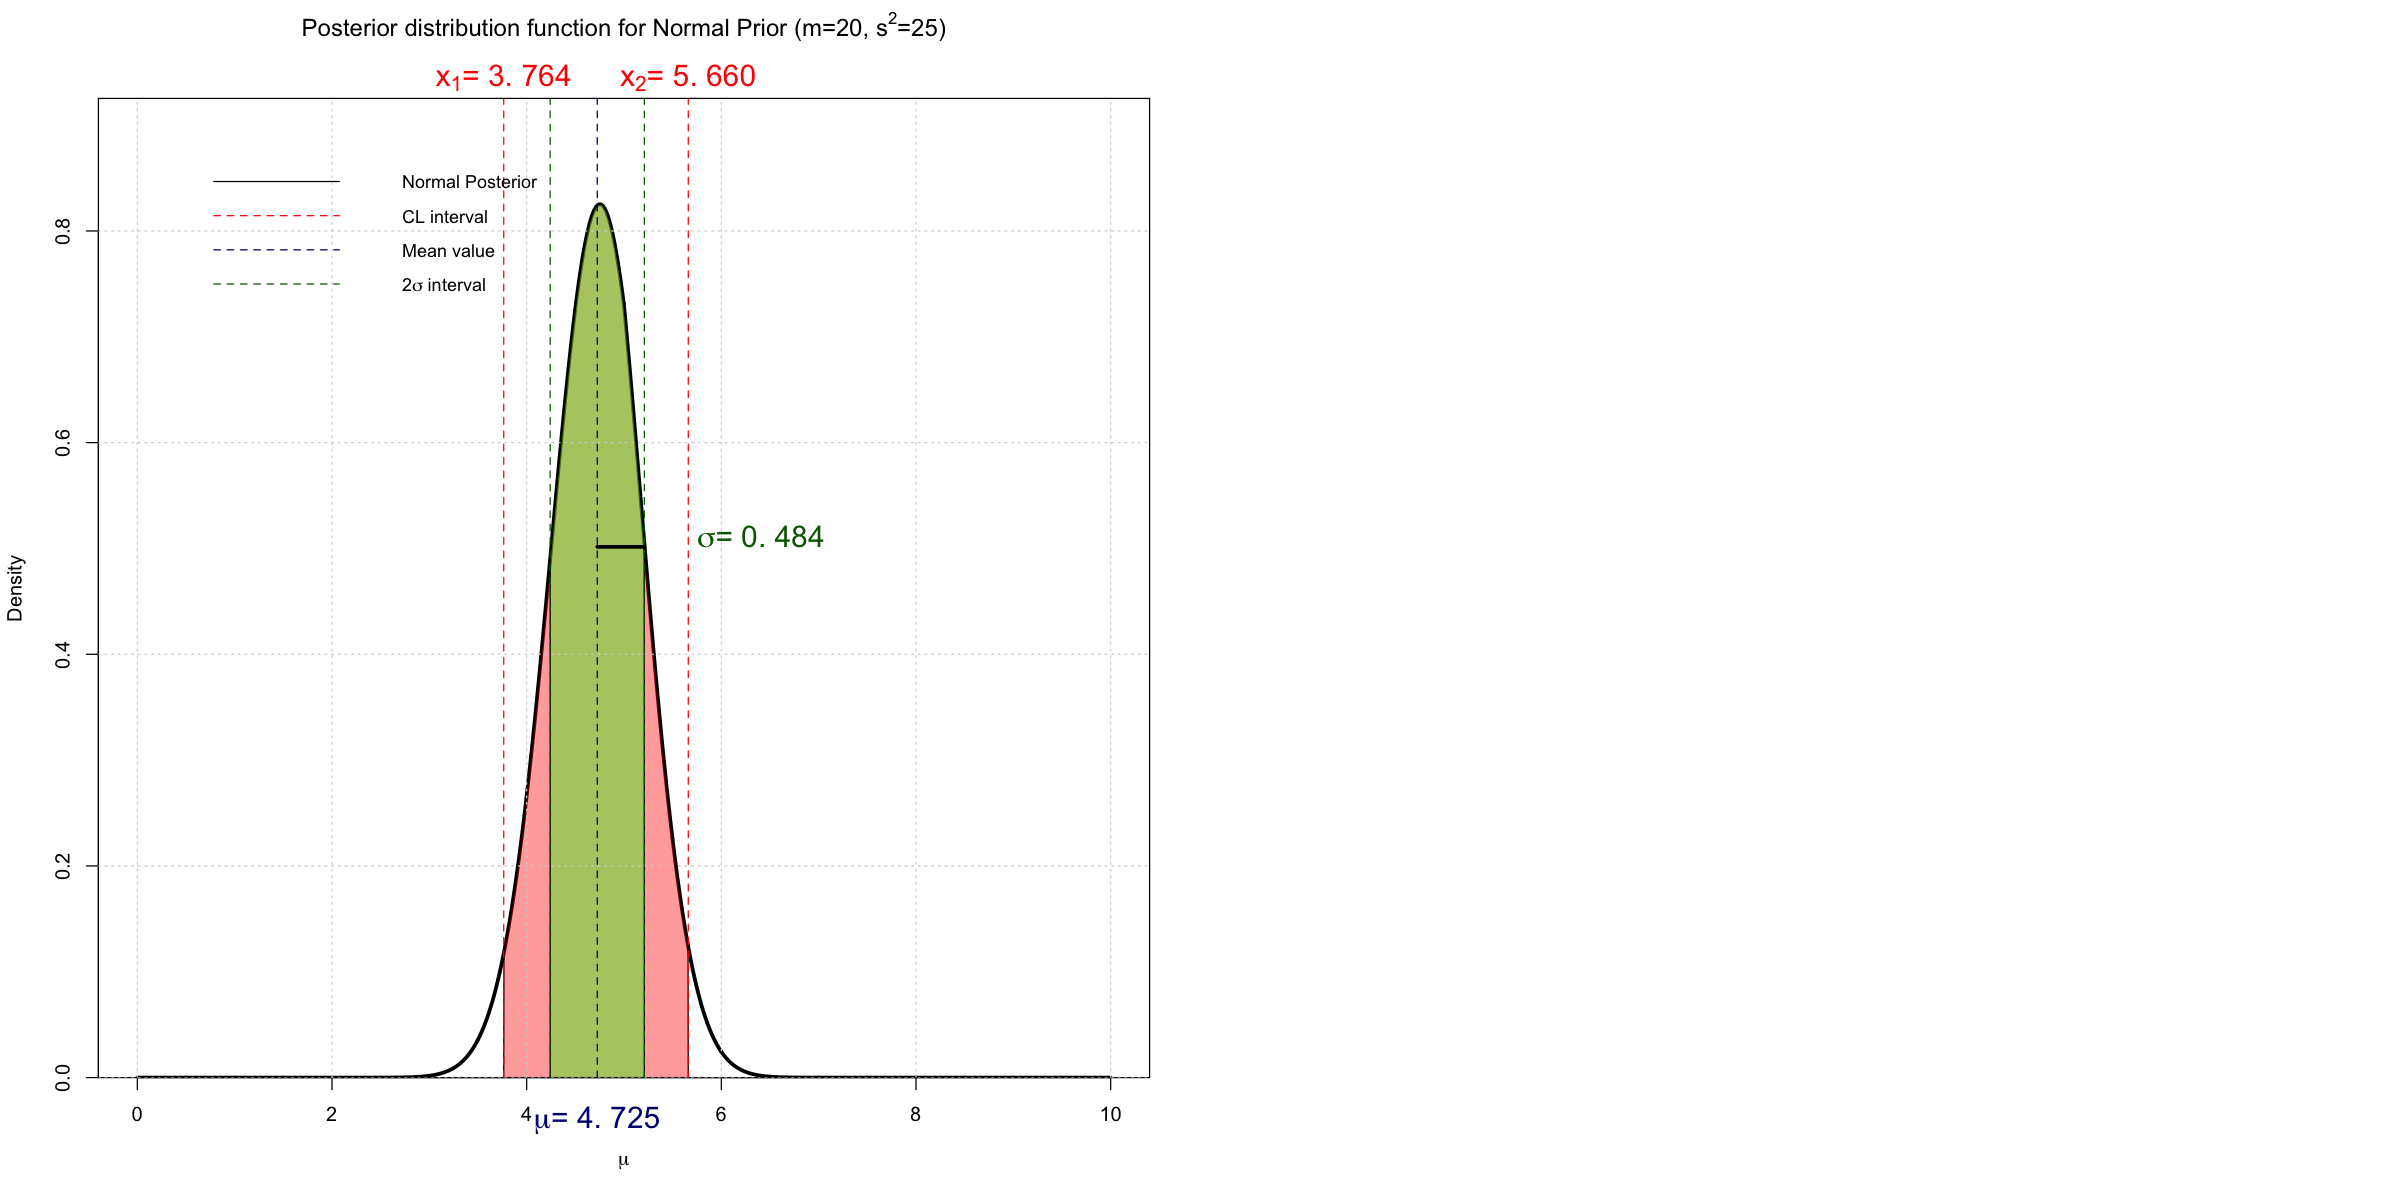

In [13]:
# set the size and position of the plots
par(mfrow=c(1,2))
options(repr.plot.width=20, repr.plot.height=10)

# Normal Posterior
plot(mu, norm.post, xaxs='r', yaxs='i', col='black', type='l', ylim=c(0,max(norm.post)+0.1),
     lty=1, lwd = 3, xlab=TeX(sprintf("$\\mu$")), ylab='Density')

title(TeX(sprintf("Posterior distribution function for Normal Prior (m=20,$s^2$=25)")),line=3)
x = x.norm

xp <- c(x[1],mu[mu>x[1] & mu<x[2]],x[2])
yp <- c(0,norm.post[which(mu>x[1] & mu<x[2])],0)
polygon(x = xp, y = yp, col = rgb(red = 1, green = 0, blue = 0, alpha = 0.4))

xsd = c(mu.post-sqrt(sd.sq.post),mu.post+sqrt(sd.sq.post))

xp <- c(xsd[1],mu[mu>xsd[1] & mu<xsd[2]],xsd[2])
yp <- c(0,norm.post[which(mu>xsd[1] & mu<xsd[2])],0)
polygon(x = xp, y = yp, col = rgb(red = 0, green = 1, blue = 0, alpha = 0.4))

# Plot sigma
xp <- c(mu.post,mu.post+sqrt(sd.sq.post))
yp <- c(norm.post[which(mu>=xsd[2] & mu<=xsd[2]+0.005)],norm.post[which(mu>=xsd[2] & mu<=xsd[2]+0.005)])

length(yp)
polygon(x = xp, y = yp, col = 'red',lwd=3)

abline(v=x[1], lty=2,col='red')
abline(v=x[2], lty=2,col='red')
abline(v=mu.post, lty=2,col='navy')
abline(v=mu.post+sqrt(sd.sq.post), lty=2,col='darkgreen')
abline(v=mu.post-sqrt(sd.sq.post), lty=2,col='darkgreen')

text(x[1], par("usr")[4] + 0.04, labels = TeX(sprintf("$x_1$= %0.3f",x[1])), pos=1, cex=1.5, col="red", xpd=TRUE)
text(x[2], par("usr")[4] + 0.04, labels = TeX(sprintf("$x_2$= %0.3f",x[2])), pos=1, cex=1.5, col="red", xpd=TRUE)
text(mu.post, par("usr")[3] - 0.02 , labels = TeX(sprintf("$\\mu$= %0.3f",mu.post)), pos=1, cex=1.5, col="navy", xpd=TRUE)
text(mu.post+1.2+sqrt(sd.sq.post), par("usr")[3] + 0.53 , labels = TeX(sprintf("$\\sigma$= %0.3f",sqrt(sd.sq.post))), pos=1, cex=1.5, col="darkgreen", xpd=TRUE)

legend("topleft", inset=0.05,legend=c("Normal Posterior","CL interval","Mean value",TeX(sprintf("2$\\sigma$ interval"))),
       col=c("black","red","navy","darkgreen"), lty=c(1,2,2,2), cex=0.9,box.lty=0)

grid()

### D)  plot, on the same graph, the prior, the likelihood and the posterior distribution

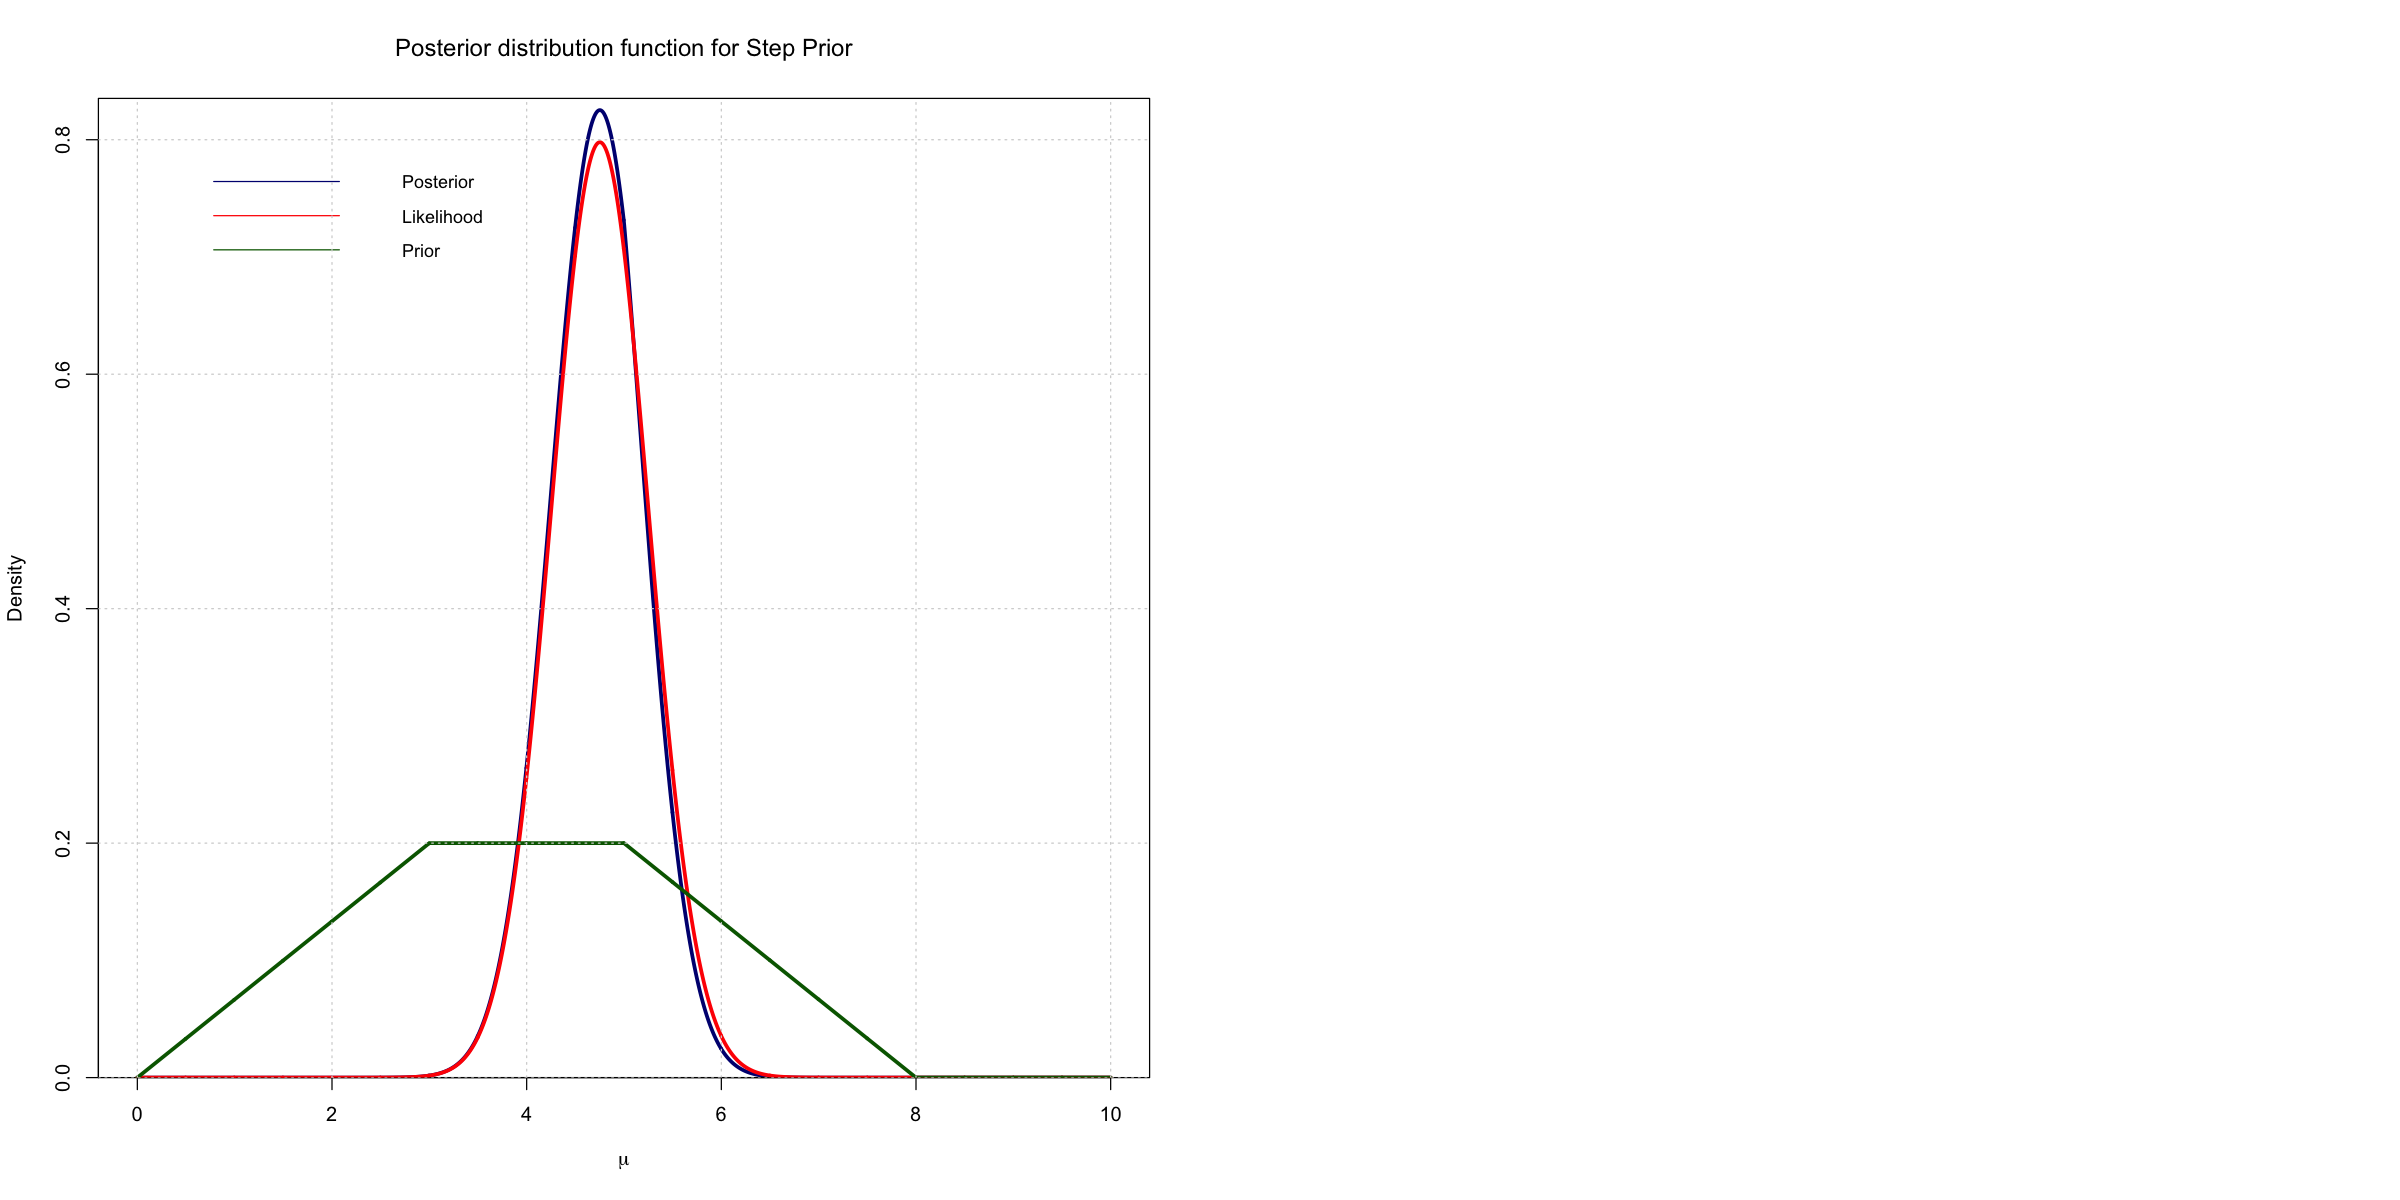

In [14]:
# Plot of the Posterior for uniform prior
# set the size and position of the plots
par(mfrow=c(1,2))
options(repr.plot.width=20, repr.plot.height=10)

plot(mu, norm.post, xaxs='r', yaxs='i', col='navy', type='l', ylim=c(0,max(norm.post)+0.01),
     main = TeX(sprintf("Posterior distribution function for Step Prior")), lty=1, lwd = 3, xlab=TeX(sprintf("$\\mu$")), 
     ylab='Density')

lines(mu,norm.like, xaxs='r', yaxs='i', col='red', type='l',lty=1, lwd = 3)
lines(mu,step.prior, xaxs='r', yaxs='i', col='darkgreen', type='l',lty=1, lwd = 3)

legend("topleft", inset=0.05,legend=c("Posterior","Likelihood","Prior"),
       col=c("navy","red","darkgreen"), lty=c(1,1,1), cex=0.9,box.lty=0)
grid()

## Exercise 3 - Water quality <a class="anchor" id="3"></a>
* [Index](#0)

A study on water quality of streams, a high level of bacter $X$ was defined as a level greater than 100 per 100 ml of stream water. 

$n = 116$ samples were taken from streams having a high environmental impact on pandas. Out of these, $y = 11$ had a high bacter $X$ level.

Indicating with $p$ the probability that a sample of water taken from the stream has a high bacter $X$ level:

### A) find the frequentist estimator for p

In the **Frequentist approach**, an **unbiased estimator** for the Binomial distribution is:

$$
p_F = \frac{y}{n}
$$

 where $y$ is the number of successes in $n$ trials.  The properties of the estimator are:
 
 $$
 E[p_F] = p \qquad Var[p_F] = \frac{p(1-p)}{n}
 $$
 

In [15]:
# Number of samples
n <- 116
# samples with an high bacter X level
y <- 11

# Frequentist estimator 
p.F <- y/n

expvalue.F <- p.F
var.F <- p.F*(1-p.F)/n

cat("The frequentist estimator is: p_F      =",p.F,'\n')
cat("The expected value is:        E[p_F]   =",expvalue.F,'\n')
cat("The variance is:              Var[p_F] =",var.F,'\n')

The frequentist estimator is: p_F      = 0.09482759 
The expected value is:        E[p_F]   = 0.09482759 
The variance is:              Var[p_F] = 0.0007399596 


### B) using a Beta(1,10) prior for p, calculate and plot  posterior distribution P(p􏰀|y)

The appropriate **Likelihood** in this case is the binomial distribution:

$$
P(y|p,n) = \begin{pmatrix} n \\ y \end{pmatrix} p^y (1-p)^{n-y} \quad y \le n
$$

Let us consider a Beta$(\alpha_p=1,\beta_p=10)$ **Prior**.

Multipling the Prior with this Likelihood, we get a Beta distribution for the **Posterior**, with parameters:

$$
\alpha = \alpha_p + y \qquad \beta = \beta_p + n - y
$$

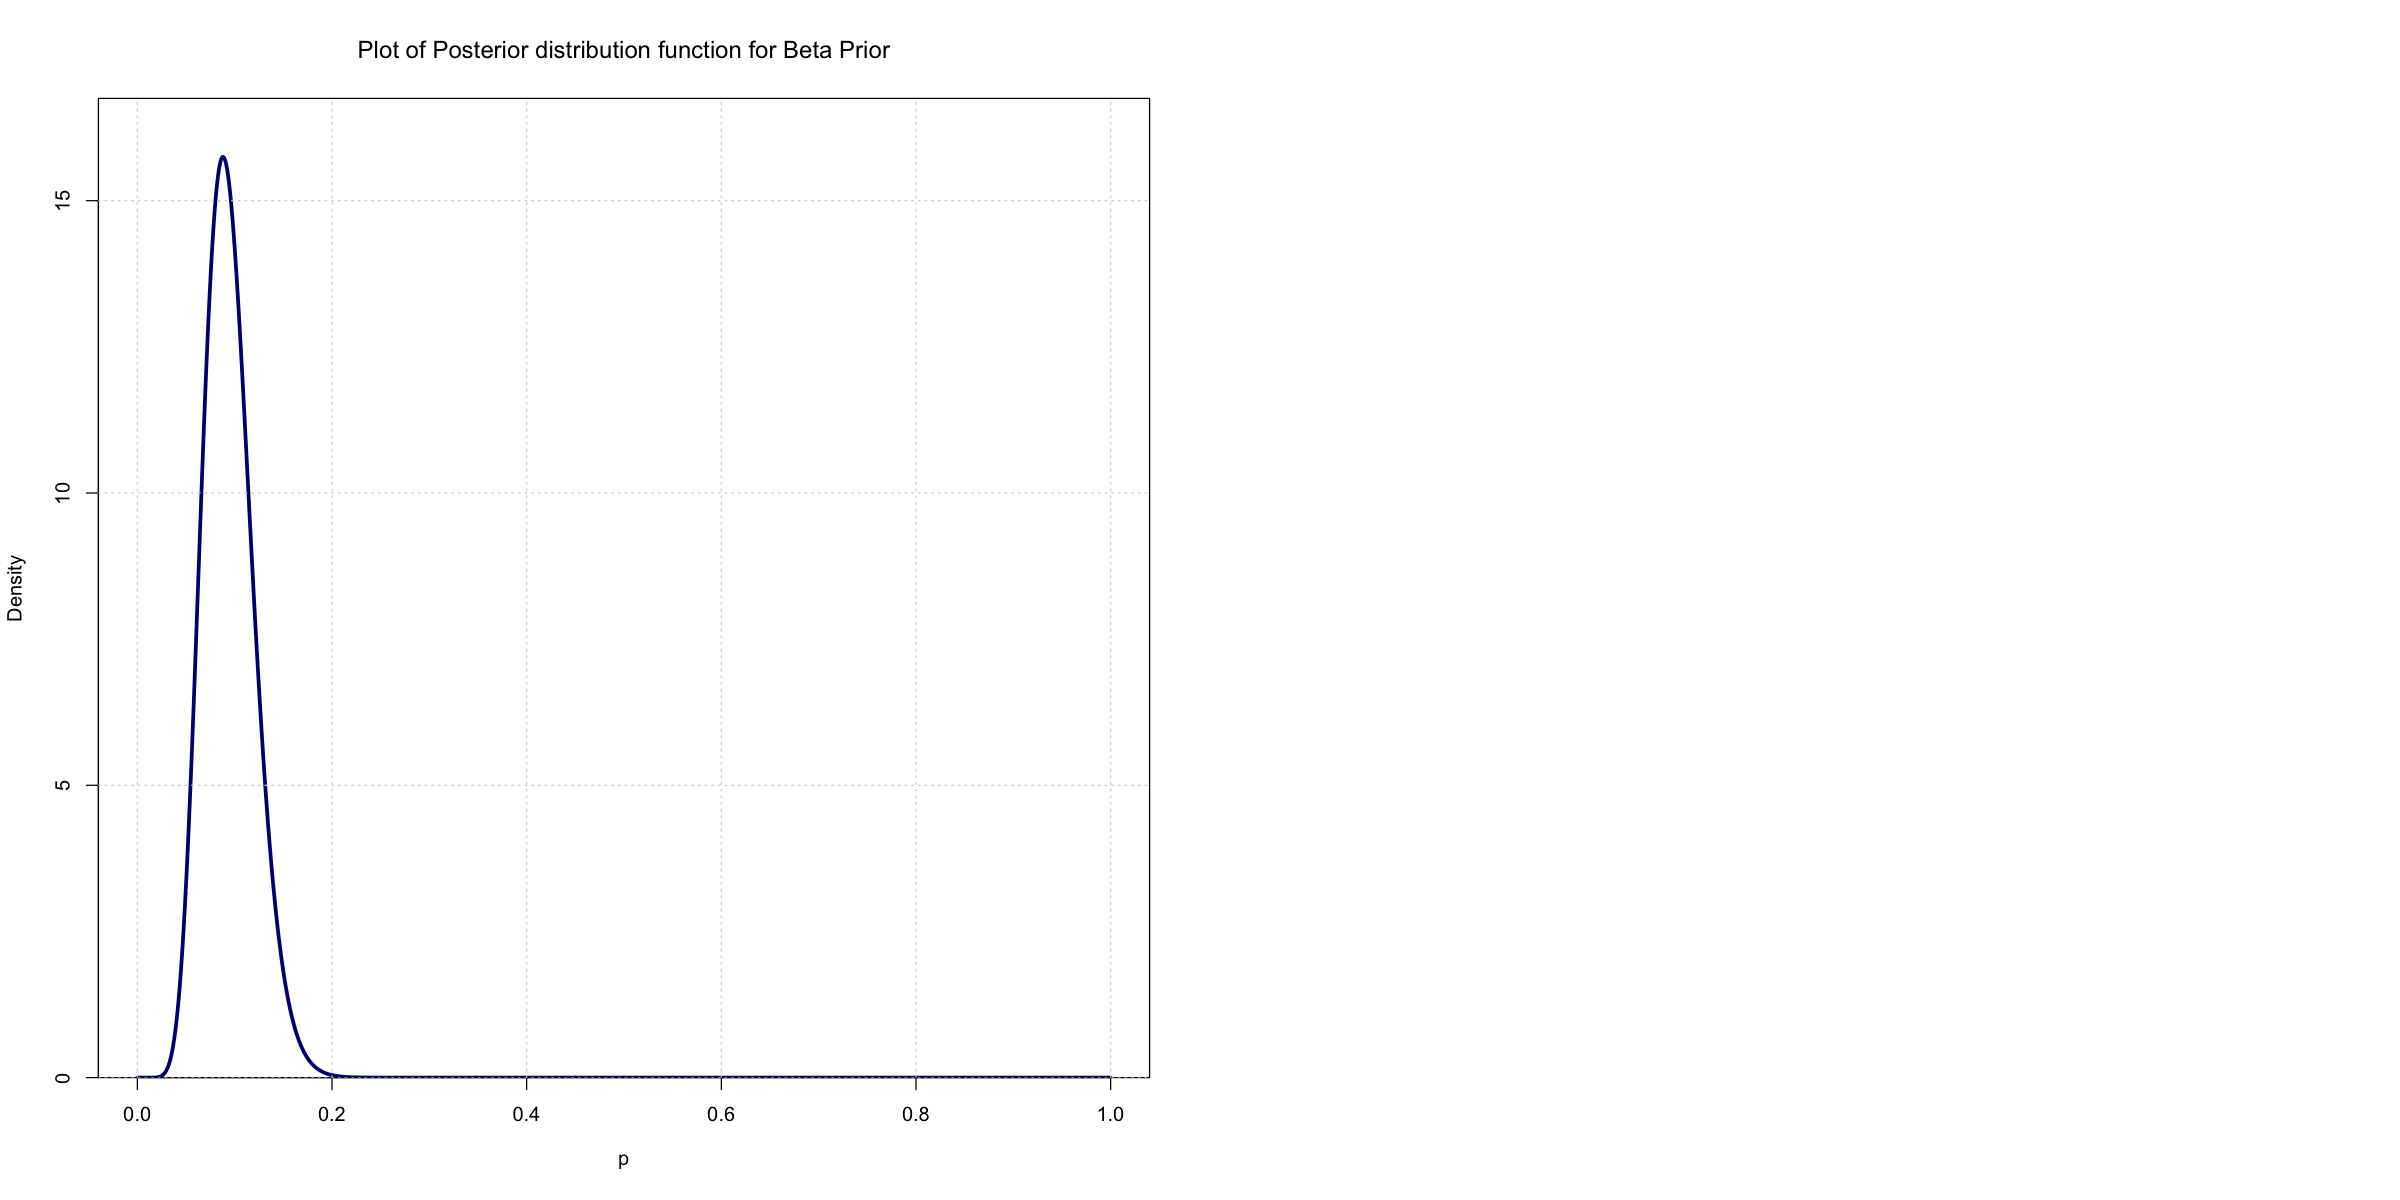

In [16]:
# Utils
n.sample <- 2000
p <- seq(0,1,length.out=n.sample)
delta.p <- p[2]-p[1]

# Beta Prior
alpha.p <- 1
beta.p <- 10
beta.prior <- dbeta(p,alpha.p,beta.p)
beta.prior <- beta.prior/(delta.p*sum(beta.prior))

# Binomial Likelihood
binom.like <- dbinom(y,size=n,prob=p)
binom.like <- binom.like/(delta.p*sum(binom.like))

# Posterior computed by LikelihoodxPrior
post <- beta.prior*binom.like
post <- post/(delta.p*sum(post))

# Beta Posterior computed by using analitycal alpha and beta 
alpha <- alpha.p + y
beta <- beta.p + n - y
beta.post <- dbeta(p,alpha,beta)

beta.post <- beta.post/(delta.p*sum(beta.post))


# Plot of the Beta Posterior 
# set the size and position of the plots
par(mfrow=c(1,2))
options(repr.plot.width=20, repr.plot.height=10)

plot(p, post, xaxs='r', yaxs='i', col='navy', type='l', ylim=c(0,max(beta.post)+1),
     main = TeX(sprintf("Plot of Posterior distribution function for Beta Prior")), lty=1, lwd = 3, xlab=TeX(sprintf("$p$")), 
     ylab='Density')

grid()

In [17]:
previous.post <- beta.post

### C) find the bayesian estimator for p, the posterior mean and variance, and a 95% credible interval

With the Bayesian approach, we use the posterior mean as an estimate for p:

$$
 p_B = m = \frac{\alpha}{ \alpha + \beta }
$$

The variance of the distribution is

$$
Var[p_B] = \Big( \frac{1}{n+2} \Big)^2 n p(1-p)
$$

In [18]:
# Posterior mean
m <- alpha/(alpha+beta)
# Bayesian estimator 
p.B <- m
# Posterior variance
var.B <- (1/(n+2))**2 * n * p.B * (1-p.B)

cat("The bayesian estimator is:   p_B      =",p.B,'\n')
cat("The posterior mean value is: m        =",m,'\n')
cat("The posterior variance is:   Var[p_B] =",var.B,'\n')

The bayesian estimator is:   p_B      = 0.09448819 
The posterior mean value is: m        = 0.09448819 
The posterior variance is:   Var[p_B] = 0.0007127966 


In [19]:
# Evaluate 95% credibility interval for Beta Posterior 

beta.area <- delta.p*cumsum(beta.post)

cl = 0.95 # Confidence level

cl.func <- function(p,cumsum.area,cl) {
            x1 <- NULL
            x2 <- NULL
            for(i in 1:(length(cumsum.area)-1)){
                cl1 <- (1-cl)/2
                cl2 <- cl+(1-cl)/2
                if ( (cumsum.area[i+1]>= cl1) & (cumsum.area[i] <= cl1)) {
                    x1 <- (p[i]+p[i+1])/2
                }
                if ( (cumsum.area[i+1]>= cl2) & (cumsum.area[i] <= cl2)) {
                    x2 <- (p[i]+p[i+1])/2
                }            
            }
            return(c(x1,x2))
           }

x.norm <- cl.func(p,beta.area,cl)

cat("Beta Posterior (Beta Prior)  :\t", 'x1=', x.norm[1],'\tx2=', x.norm[2],'\n')

Beta Posterior (Beta Prior)  :	 x1= 0.04977489 	x2= 0.1508254 


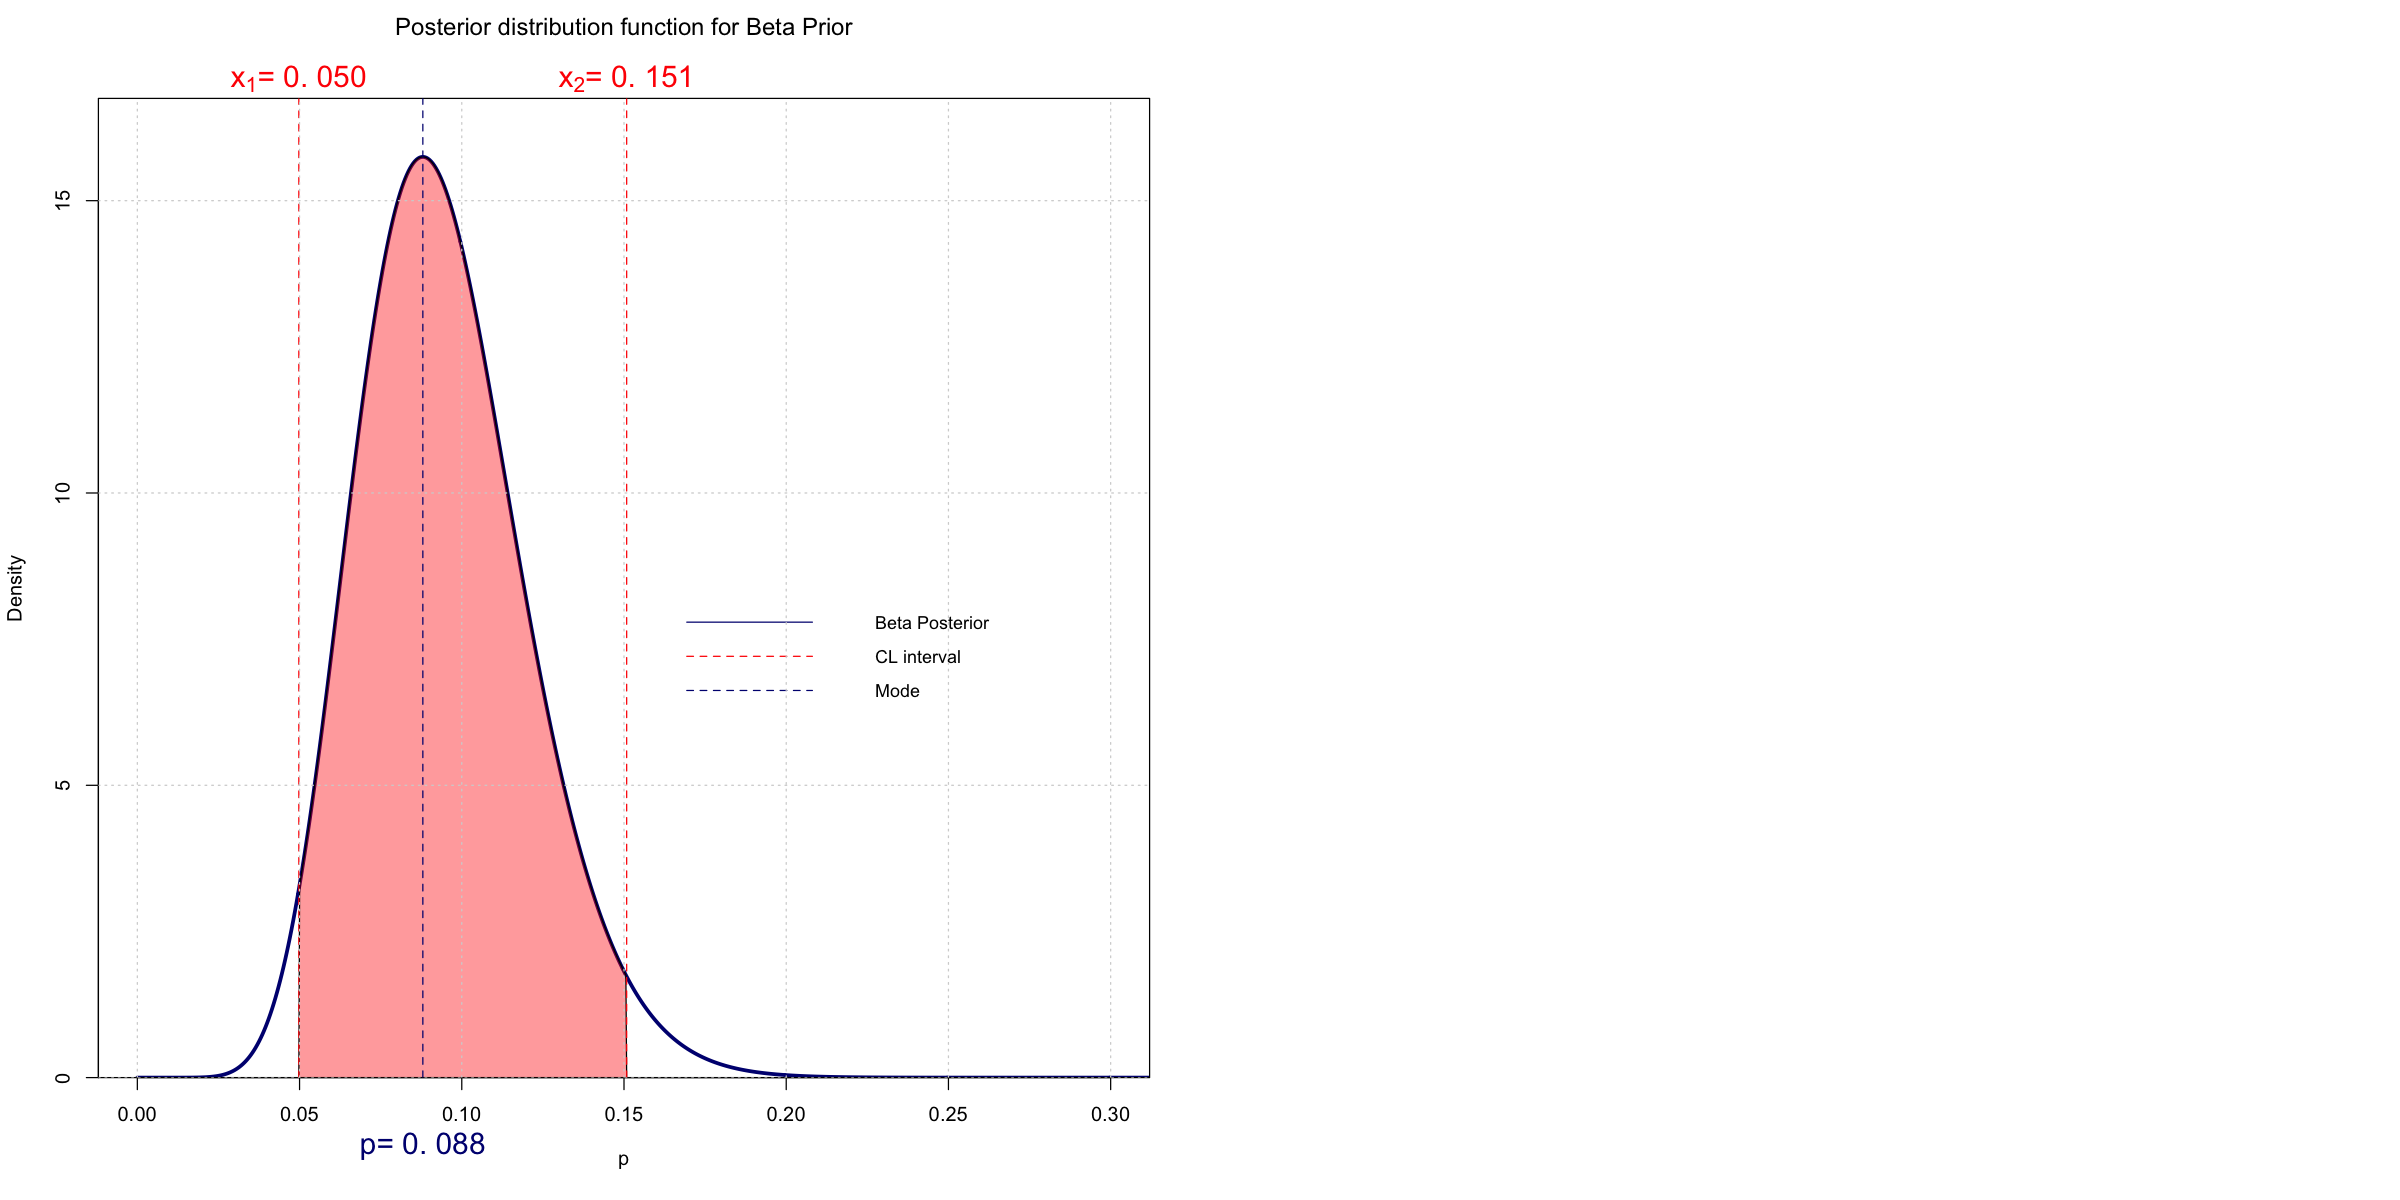

In [20]:
# set the size and position of the plots
par(mfrow=c(1,2))
options(repr.plot.width=20, repr.plot.height=10)

# Beta Posterior
plot(p, beta.post, xaxs='r', yaxs='i', col='navy', type='l', ylim=c(0,max(beta.post)+1),xlim=c(0,0.3),
     lty=1, lwd = 3, xlab=TeX(sprintf("$p$")), ylab='Density')

title(TeX(sprintf("Posterior distribution function for Beta Prior")),line=3)
x = x.norm

xp <- c(x[1],p[p>x[1] & p<x[2]],x[2])
yp <- c(0,beta.post[which(p>x[1] & p<x[2])],0)
polygon(x = xp, y = yp, col = rgb(red = 1, green = 0, blue = 0, alpha = 0.4))

# Compute the mode
mode = (alpha-1)/(alpha.p+beta.p+n-2)

abline(v=x[1], lty=2,col='red')
abline(v=x[2], lty=2,col='red')
abline(v=mode, lty=2,col='navy')

text(x[1], par("usr")[4] + 0.7, labels = TeX(sprintf("$x_1$= %0.3f",x[1])), pos=1, cex=1.5, col="red", xpd=TRUE)
text(x[2], par("usr")[4] + 0.7, labels = TeX(sprintf("$x_2$= %0.3f",x[2])), pos=1, cex=1.5, col="red", xpd=TRUE)
text(mode, par("usr")[3] - 0.8 , labels = TeX(sprintf("$p$= %0.3f",mode)), pos=1, cex=1.5, col="navy", xpd=TRUE)

legend("topleft", inset=0.5,legend=c("Beta Posterior","CL interval","Mode"),
       col=c("navy","red","navy"), lty=c(1,2,2), cex=0.9,box.lty=0)

grid()

### D) test the hypotesis $H_0: p=0.1 \text{ versus } H_1: p \neq 0.1 $ at 5% level of significance with both the frequentist and bayesian approach

#### Frequentist approach

In [21]:
# Probability of null hypotesis
p.hyp <- 0.1
y <- 0:n

# Null hyphotesis
null.hyp <- dbinom(y,size=n,prob=p.hyp)

cum.sum <- cumsum(null.hyp)

In defining the rejection region, we take into account that $y$ has a **discrete distribution**, and choose the level of significance as close to 5% as possible.

In [22]:
cl.discrete.func <- function(p,cumsum.area,cl) {
            x1 <- NULL
            x2 <- NULL
            for(i in 1:(length(cumsum.area)-1)){
                cl1 <- (1-cl)/2
                cl2 <- cl+(1-cl)/2
                if ( (cumsum.area[i+1]>= cl1) & (cumsum.area[i] <= cl1)) {
                    x1 <-  p[i] # rounds to the nearest integer that’s smaller than x
                    area.1 <- cumsum.area[i]
                }
                if ( (cumsum.area[i+1]>= cl2) & (cumsum.area[i] <= cl2)) {
                    x2 <- p[i+1] # rounds to the nearest integer that’s larger than x
                    area.2 <- 1 - cumsum.area[i+1]
                }            
            }
            return(c(x1,x2,area.1,area.2))
           }

cl = 0.95 # Confidence level
alpha = 0.025

x <- cl.discrete.func(y,cum.sum,cl)
x1 <- x[1]
x2 <- x[2]
area1 <- x[3]
area2 <- x[4]
area <- area1 +area2

cat("x1           : ", x1,'\n')
cat("x2           : ", x2,'\n')
cat("area 1       : ", area1,'\n')
cat("area 2       : ", area2,'\n')
cat("alpha        : ", area,'\n')

x1           :  5 
x2           :  18 
area 1       :  0.02092518 
area 2       :  0.02161829 
alpha        :  0.04254348 


We have obtained the interval: 

$$
\{ y \le 5 \} \cup \{ y>=18 \} \text{ with } \alpha = 0.0425
$$

We observe y=11 which lies inside the acceptance region, hence we cannot reject the hyphotesis $H_0$. Let us see it with a plot:

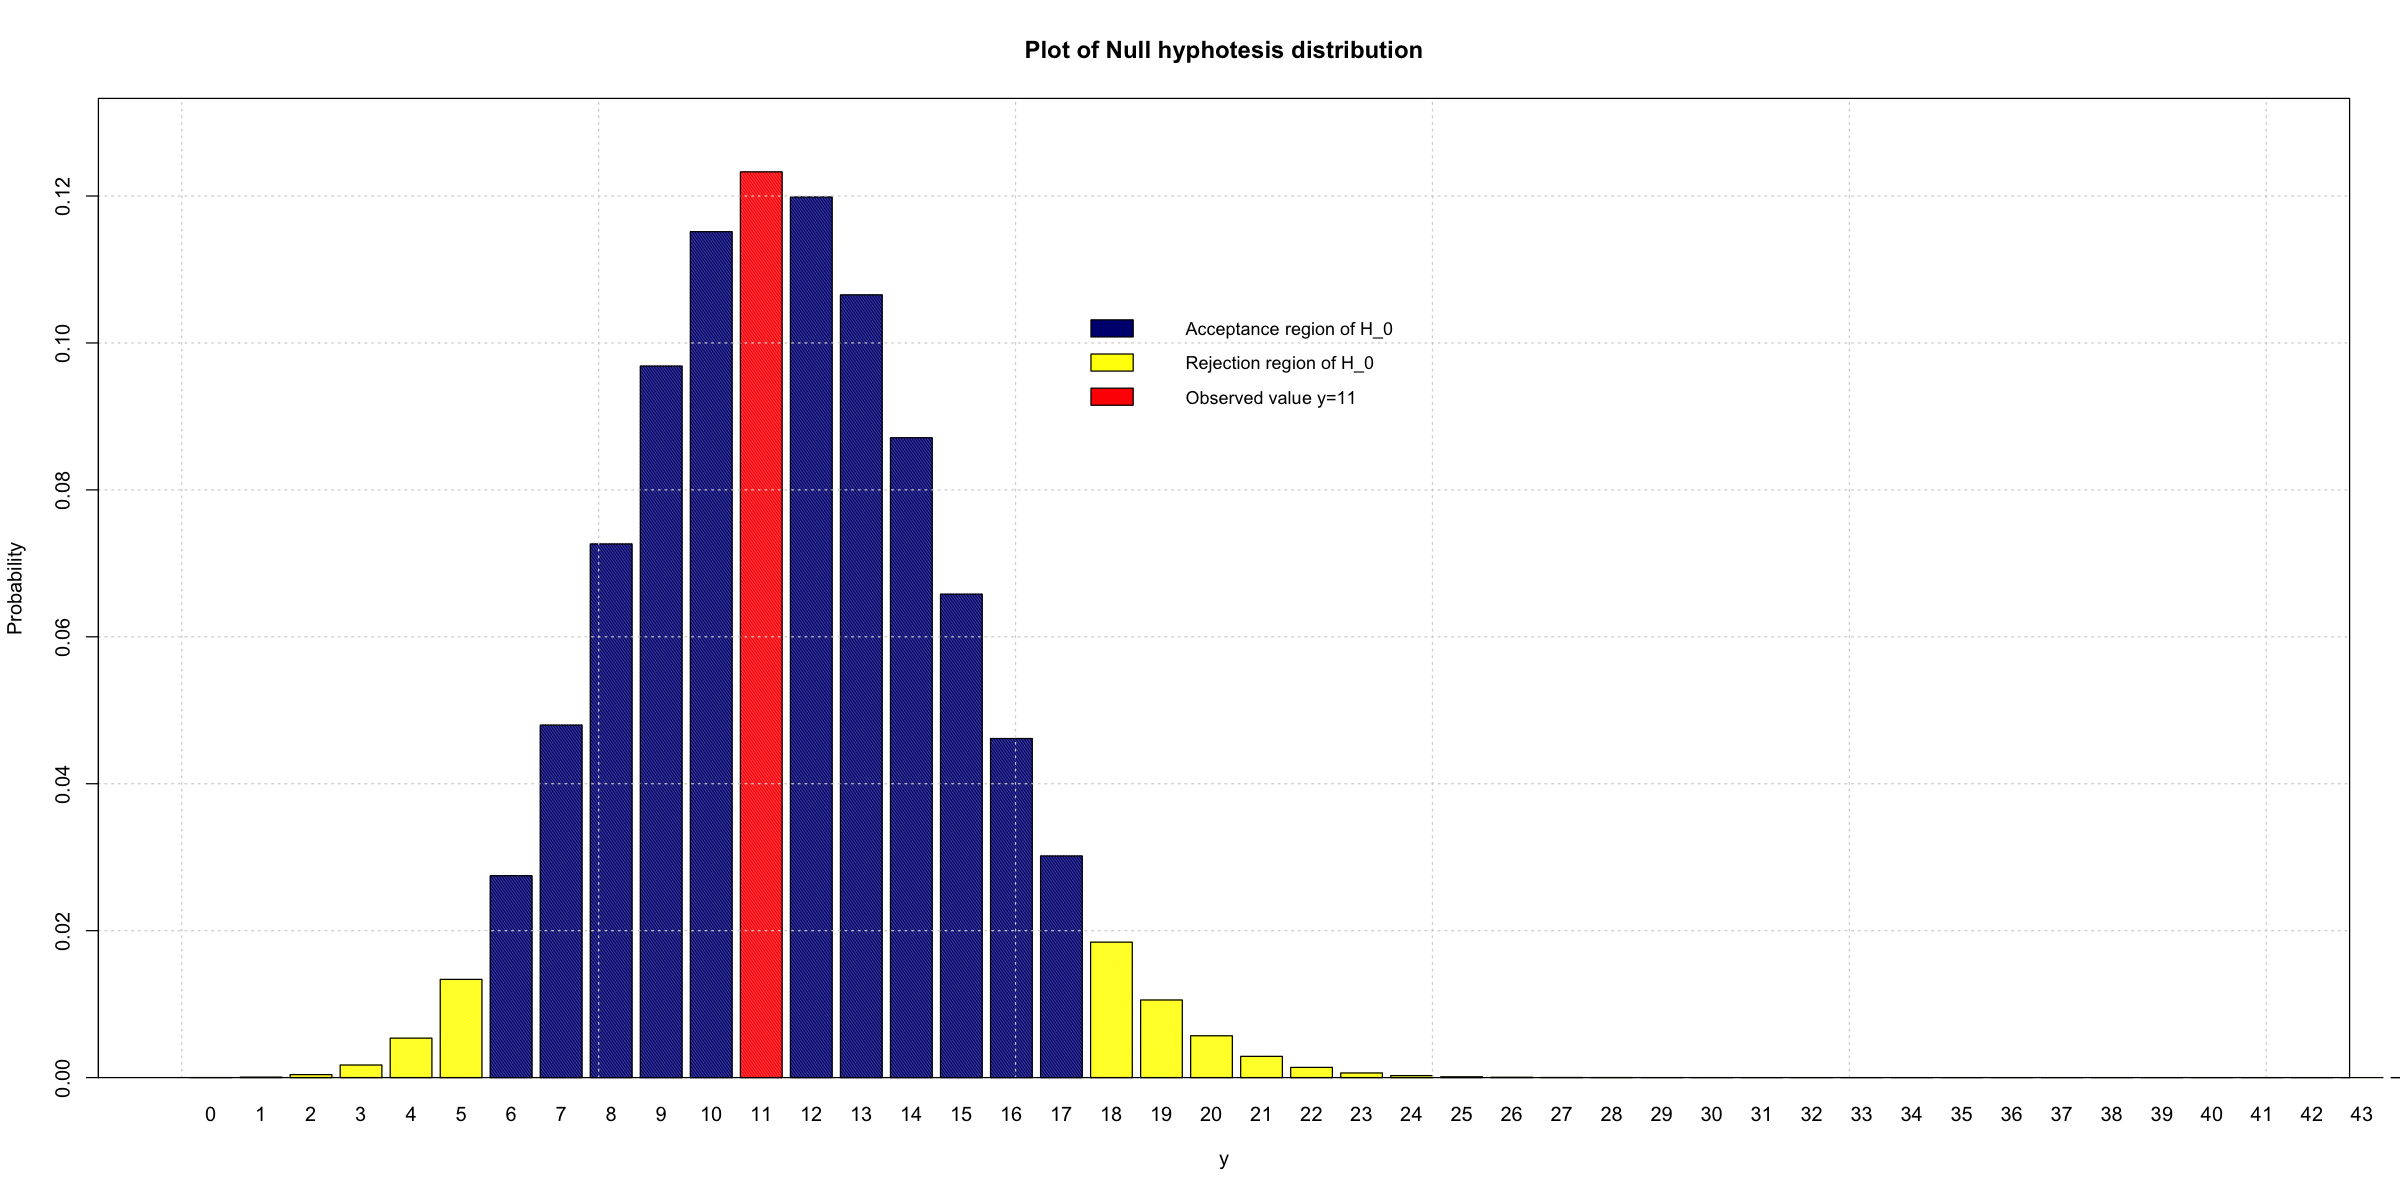

In [23]:
# set the size and position of the plots
par(mfrow=c(1,1))
options(repr.plot.width=20, repr.plot.height=10)

cols <- c("navy","yellow")
pos <- (y <=x1 | y>=x2)

# Plot Null hyphotesis
barplot(null.hyp, names=y, col=ifelse(y==11,'red',cols[pos + 1]), ylim=c(0,max(null.hyp)+0.01),density=200,
        main="Plot of Null hyphotesis distribution", xlim=c(0,50),
        xlab=TeX(sprintf("$y$")), ylab='Probability')

legend("topright", inset=+0.2,legend=c("Acceptance region of H_0","Rejection region of H_0","Observed value y=11"),
       fill=c("navy","yellow","red"),cex=0.9,box.lty=0)

grid()
box()

#### Bayesian approach

Credibility interval for beta Posterior (Beta Prior)  :	 x1= 0.04977489 	x2= 0.1508254 


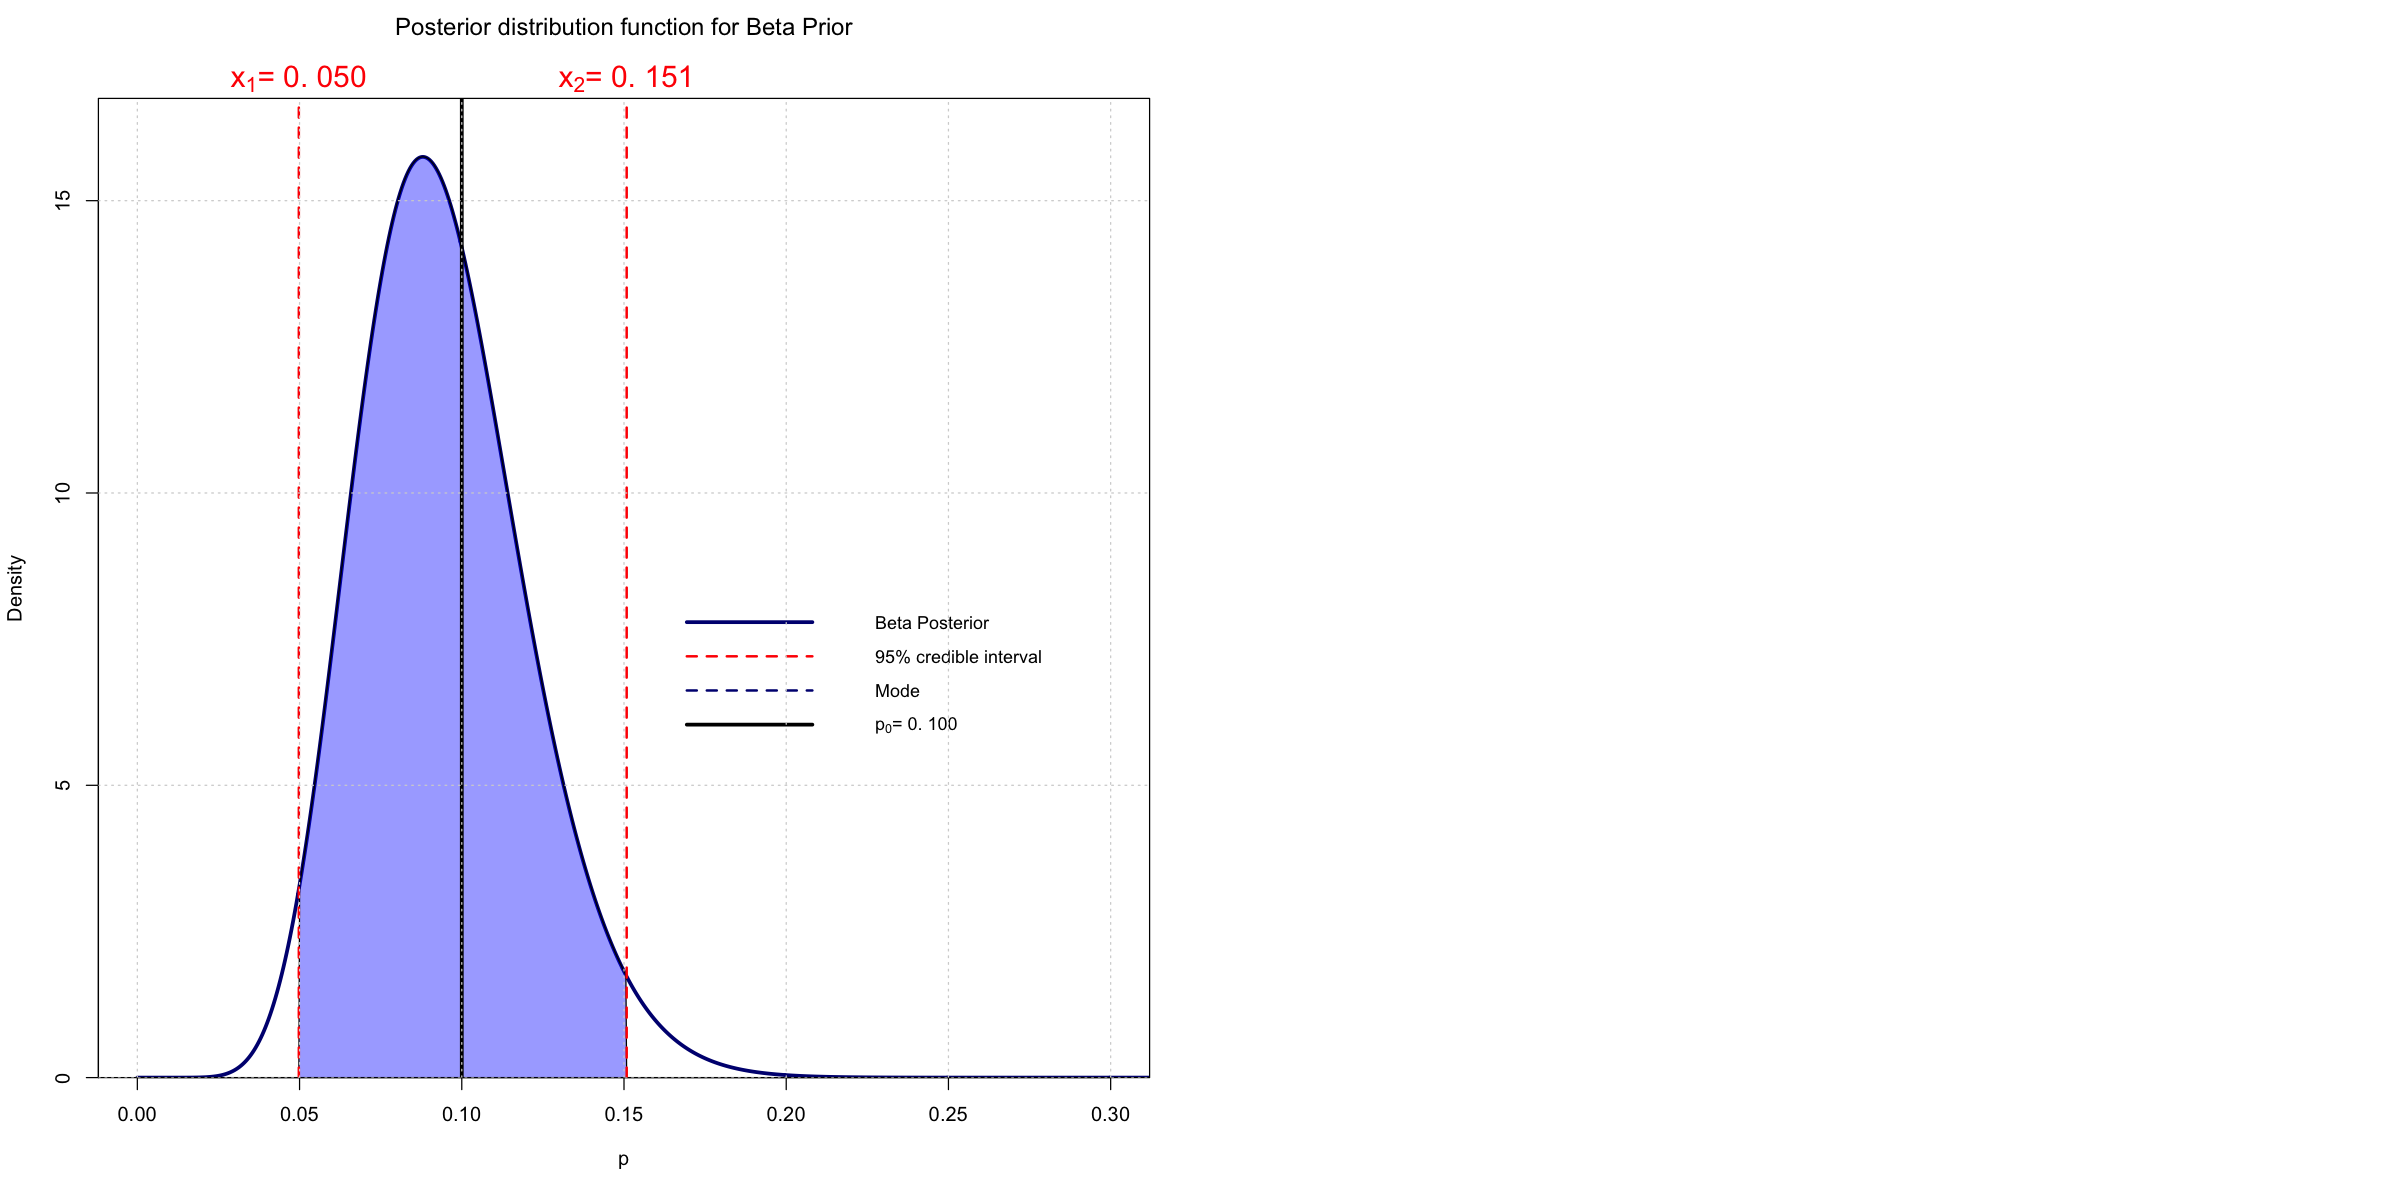

In [24]:
cat("Credibility interval for beta Posterior (Beta Prior)  :\t", 'x1=', x.norm[1],'\tx2=', x.norm[2],'\n')


# set the size and position of the plots
par(mfrow=c(1,2))
options(repr.plot.width=20, repr.plot.height=10)

# Beta Posterior
plot(p, beta.post, xaxs='r', yaxs='i', col='navy', type='l', ylim=c(0,max(beta.post)+1),xlim=c(0,0.3),
     lty=1, lwd = 3, xlab=TeX(sprintf("$p$")), ylab='Density')

title(TeX(sprintf("Posterior distribution function for Beta Prior")),line=3)
x = x.norm

xp <- c(x[1],p[p>x[1] & p<x[2]],x[2])
yp <- c(0,beta.post[which(p>x[1] & p<x[2])],0)
polygon(x = xp, y = yp, col = rgb(red = 0, green = 0, blue = 1, alpha = 0.4))

abline(v=x[1], lty=2,col='red',lwd=2)
abline(v=x[2], lty=2,col='red',lwd=2)

abline(v=p.hyp, lty=1,col='black',lwd=3)

text(x[1], par("usr")[4] + 0.7, labels = TeX(sprintf("$x_1$= %0.3f",x[1])), pos=1, cex=1.5, col="red", xpd=TRUE)
text(x[2], par("usr")[4] + 0.7, labels = TeX(sprintf("$x_2$= %0.3f",x[2])), pos=1, cex=1.5, col="red", xpd=TRUE)

legend("topleft", inset=+0.5,legend=c("Beta Posterior","95% credible interval","Mode",TeX(sprintf("$p_0$= %0.3f",p.hyp))),
       col=c("navy","red","navy","black"), lty=c(1,2,2,1), lwd=c(3,2,2,3),cex=0.9,box.lty=0)

grid()

The value of $p_0=0.1$ lies inside the 95% credible interval, hence we do not reject the null hyphotesis $H_0$.

A new measurement, performed one month later on $n = 165$ water samples, gives $y = 9$ high bacter $X$ level:

### E) find the frequentist estimator for p

In [25]:
# Number of samples
n <- 165
# samples with an high bacter X level
y <- 9

# Frequentist estimator 
p.F <- y/n

expvalue.F <- p.F
var.F <- p.F*(1-p.F)/n

cat("The frequentist estimator is: p_F      =",p.F,'\n')
cat("The expected value is:        E[p_F]   =",expvalue.F,'\n')
cat("The variance is:              Var[p_F] =",var.F,'\n')

The frequentist estimator is: p_F      = 0.05454545 
The expected value is:        E[p_F]   = 0.05454545 
The variance is:              Var[p_F] = 0.000312547 


### F) find a bayesian estimator for p, assuming both a Beta(1,10) prior for p, and assuming the posterior probability of the older measurement as the prior for the new one.

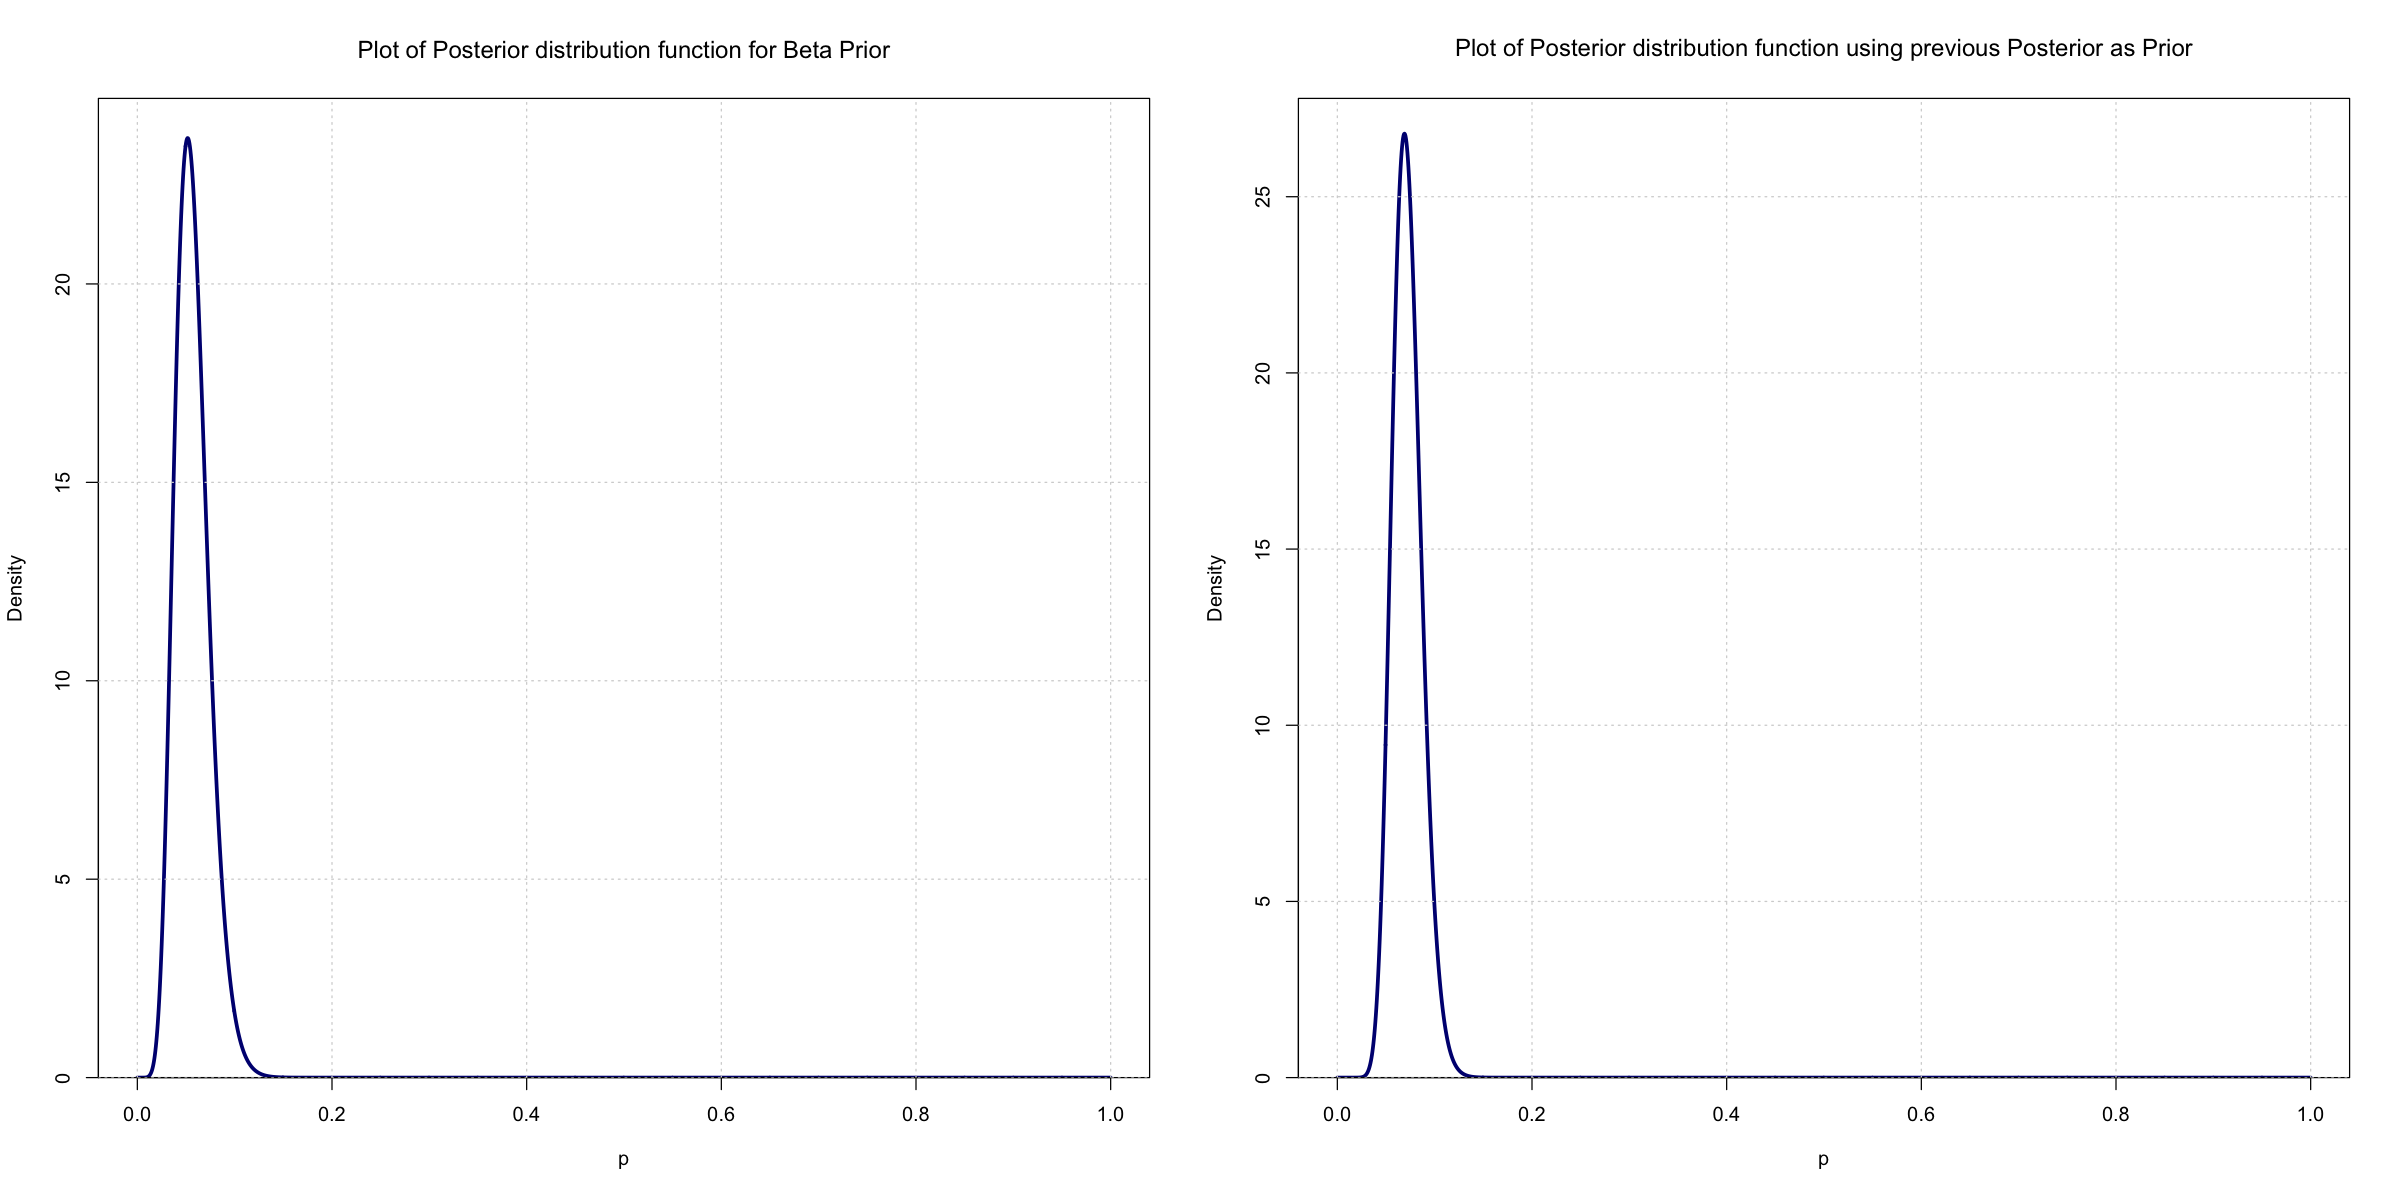

In [26]:
# Utils
n.sample <- 2000
p <- seq(0,1,length.out=n.sample)
delta.p <- p[2]-p[1]

# Beta Prior
alpha.p <- 1
beta.p <- 10
beta.prior <- dbeta(p,alpha.p,beta.p)
# Normalization
beta.prior <- beta.prior/(delta.p*sum(beta.prior))

# Binomial Likelihood
binom.like <- dbinom(y,size=n,prob=p)
# Normalization
binom.like <- binom.like/(delta.p*sum(binom.like))

# Posterior computed with the Beta Prior
alpha <- alpha.p + y
beta <- beta.p + n - y
beta.post <- dbeta(p,alpha,beta)
# Normalization
beta.post <- beta.post/(delta.p*sum(beta.post))

# Posterior computed with the previous Posterior as new prior
new.post <- previous.post * binom.like
# Normalization
new.post <- new.post/(delta.p*sum(new.post))


# Plot of the Beta Posterior 
# set the size and position of the plots
par(mfrow=c(1,2))
options(repr.plot.width=20, repr.plot.height=10)

plot(p, beta.post, xaxs='r', yaxs='i', col='navy', type='l', ylim=c(0,max(beta.post)+1),
     main = TeX(sprintf("Plot of Posterior distribution function for Beta Prior")), lty=1, lwd = 3, xlab=TeX(sprintf("$p$")), 
     ylab='Density')
grid()

plot(p, new.post, xaxs='r', yaxs='i', col='navy', type='l', ylim=c(0,max(new.post)+1),
     main = TeX(sprintf("Plot of Posterior distribution function using previous Posterior as Prior")), lty=1, lwd = 3, xlab=TeX(sprintf("$p$")), 
     ylab='Density')

grid()

###  G) find the bayesian estimator for p, the posterior mean and variance, and a 95% credible interval

#### Beta Prior

The bayesian estimator is:   p_B      = 0.05681818 
The posterior mean value is: m        = 0.05681818 
The posterior variance is:   Var[p_B] = 0.0003170544 


Posterior (Beta Prior)  : x1= 0.02726363  x2= 0.09529765 


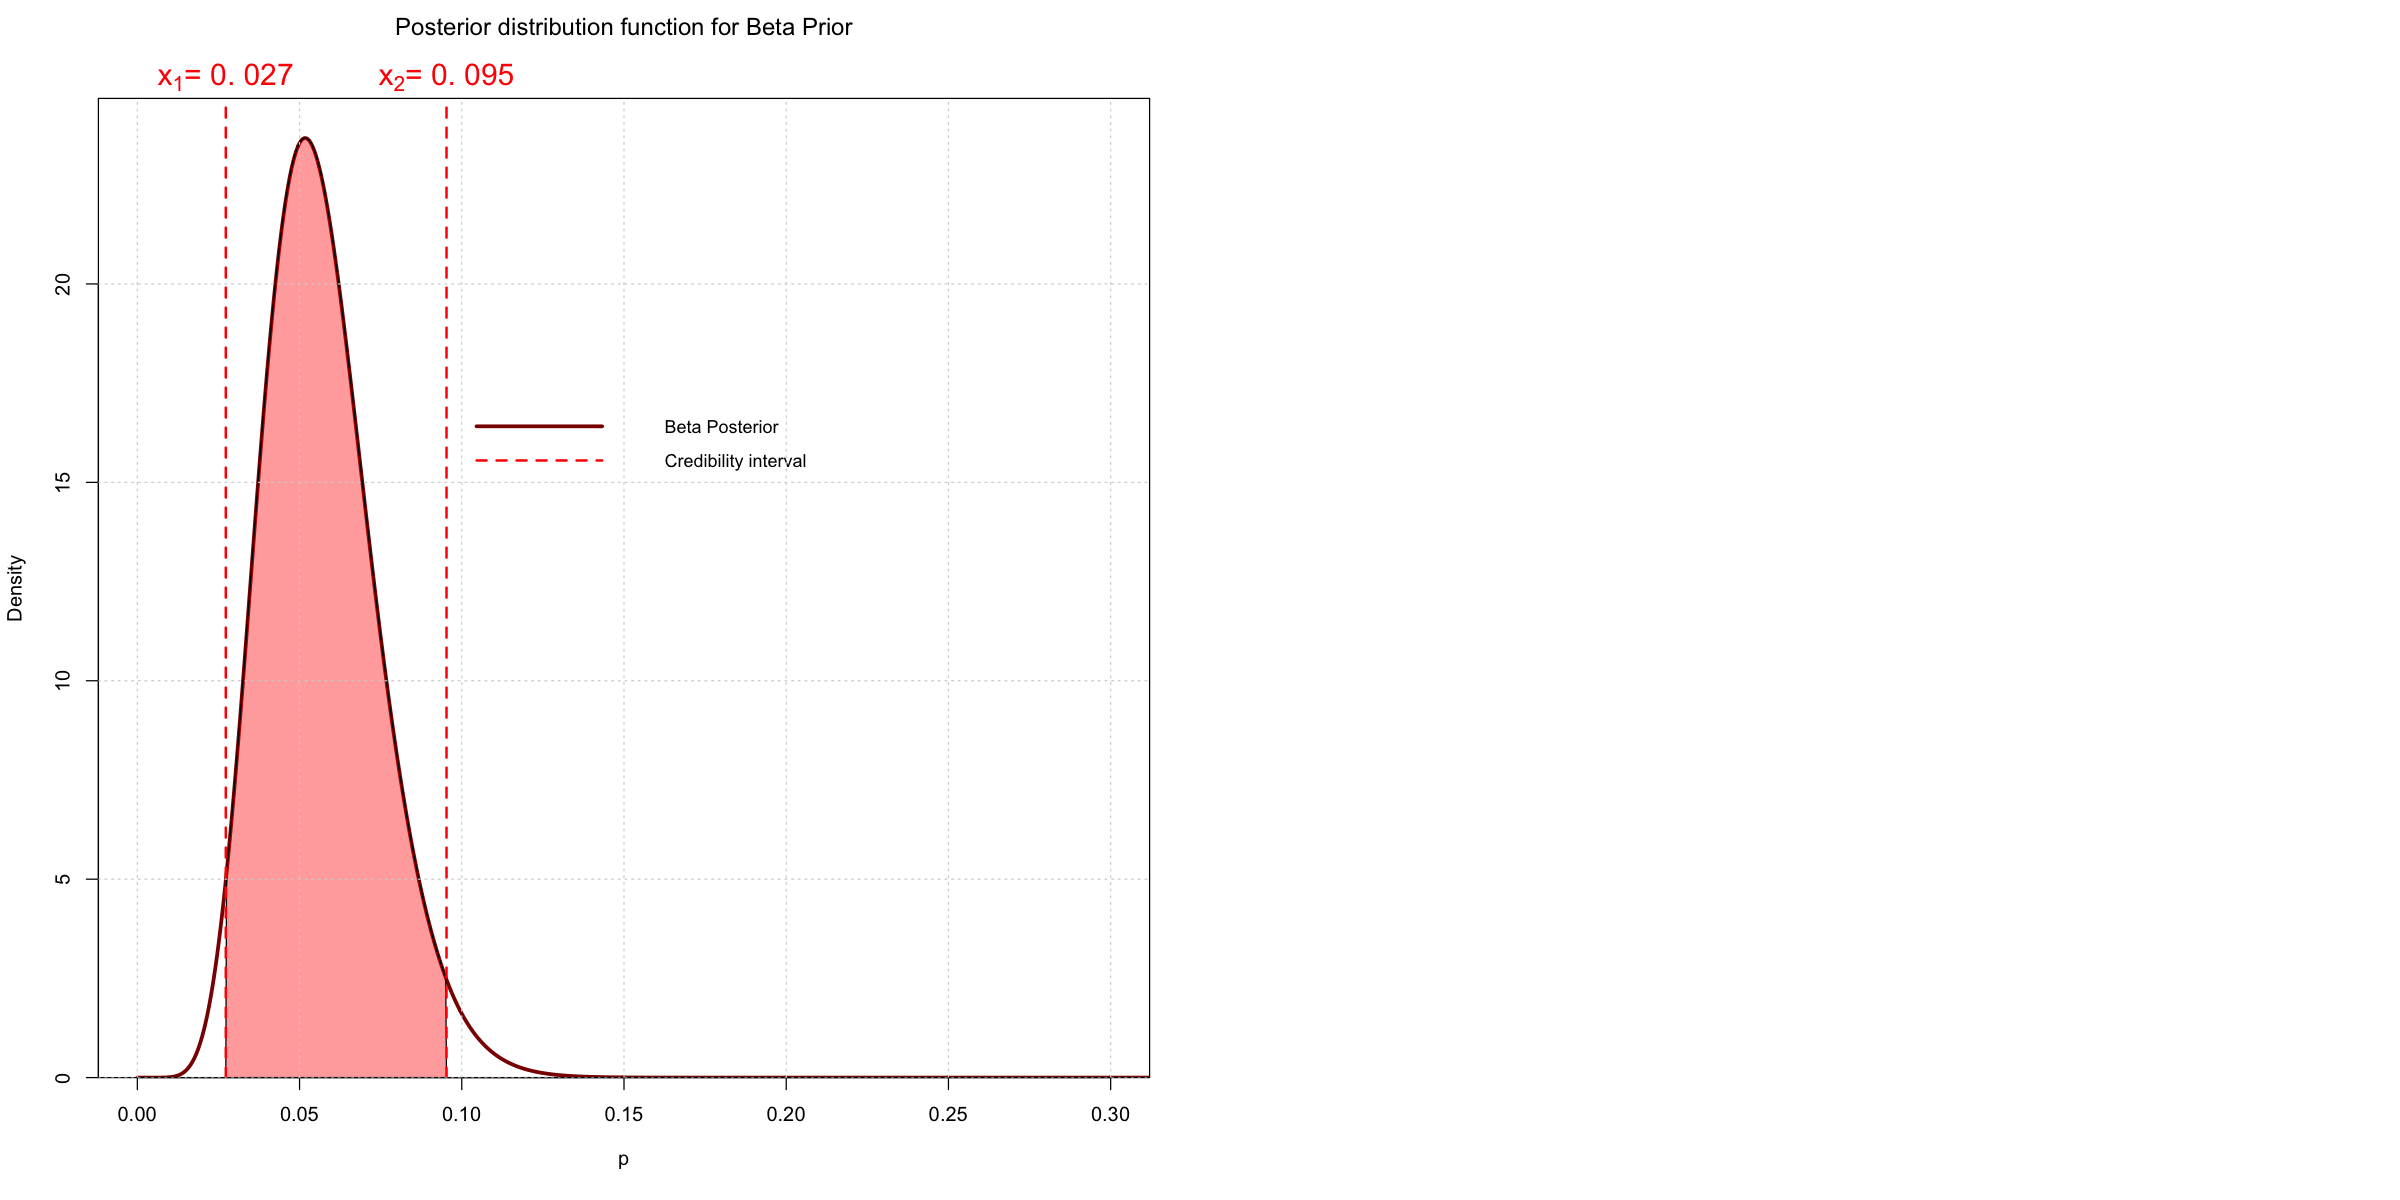

In [27]:
# Posterior mean computed with the Beta Prior
m <- alpha/(alpha+beta)
# Bayesian estimator 
p.B <- m
# Posterior variance
var.B <- (1/(n+2))**2 * n * p.B * (1-p.B)

cat("The bayesian estimator is:   p_B      =",p.B,'\n')
cat("The posterior mean value is: m        =",m,'\n')
cat("The posterior variance is:   Var[p_B] =",var.B,'\n')


# Evaluate 95% credibility interval for Beta Posterior 

beta.area <- delta.p*cumsum(beta.post)

cl = 0.95 # Confidence level

cl.func <- function(p,cumsum.area,cl) {
            x1 <- NULL
            x2 <- NULL
            for(i in 1:(length(cumsum.area)-1)){
                cl1 <- (1-cl)/2
                cl2 <- cl+(1-cl)/2
                if ( (cumsum.area[i+1]>= cl1) & (cumsum.area[i] <= cl1)) {
                    x1 <- (p[i]+p[i+1])/2
                    area1 <- (cumsum.area[i] + cumsum.area[i+1])/2
                }
                if ( (cumsum.area[i+1]>= cl2) & (cumsum.area[i] <= cl2)) {
                    x2 <- (p[i]+p[i+1])/2
                    area2 <- 1 - (cumsum.area[i] + cumsum.area[i+1])/2
                }            
            }
            return(c(x1,x2,area1,area2))
           }

x.beta <- cl.func(p,beta.area,cl)

cat('\n\n')
cat("Posterior (Beta Prior)  :", 'x1=', x.beta[1],' x2=', x.beta[2],'\n')

# PLOT
# set the size and position of the plots
par(mfrow=c(1,2))
options(repr.plot.width=20, repr.plot.height=10)

# Beta Posterior
plot(p, beta.post, xaxs='r', yaxs='i', col='darkred', type='l', ylim=c(0,max(beta.post)+1),xlim=c(0,0.3),
     lty=1, lwd = 3, xlab=TeX(sprintf("$p$")), ylab='Density')

title(TeX(sprintf("Posterior distribution function for Beta Prior")),line=3)

x = x.beta
xp <- c(x[1],p[p>x[1] & p<x[2]],x[2])
yp <- c(0,beta.post[which(p>x[1] & p<x[2])],0)
polygon(x = xp, y = yp, col = rgb(red = 1, green = 0, blue = 0, alpha = 0.4))

abline(v=x[1], lty=2,col='red', lwd=2)
abline(v=x[2], lty=2,col='red', lwd=2)

text(x[1], par("usr")[4] + 1.08, labels = TeX(sprintf("$x_1$= %0.3f",x[1])), pos=1, cex=1.5, col="red", xpd=TRUE)
text(x[2], par("usr")[4] + 1.08, labels = TeX(sprintf("$x_2$= %0.3f",x[2])), pos=1, cex=1.5, col="red", xpd=TRUE)

legend("topleft", inset=0.3,legend=c("Beta Posterior","Credibility interval"),
       col=c("darkred","red"), lty=c(1,2), lwd=c(3,2), cex=0.9,box.lty=0)

grid()

#### Previous Posterior as new prior

The bayesian estimator is:   p_B      = 0.07191781 
The posterior mean value is: m        = 0.07191781 
The posterior variance is:   Var[p_B] = 0.0002278008 


Beta Posterior (Beta Prior)  :	 x1= 0.04477239 	x2= 0.1038019 


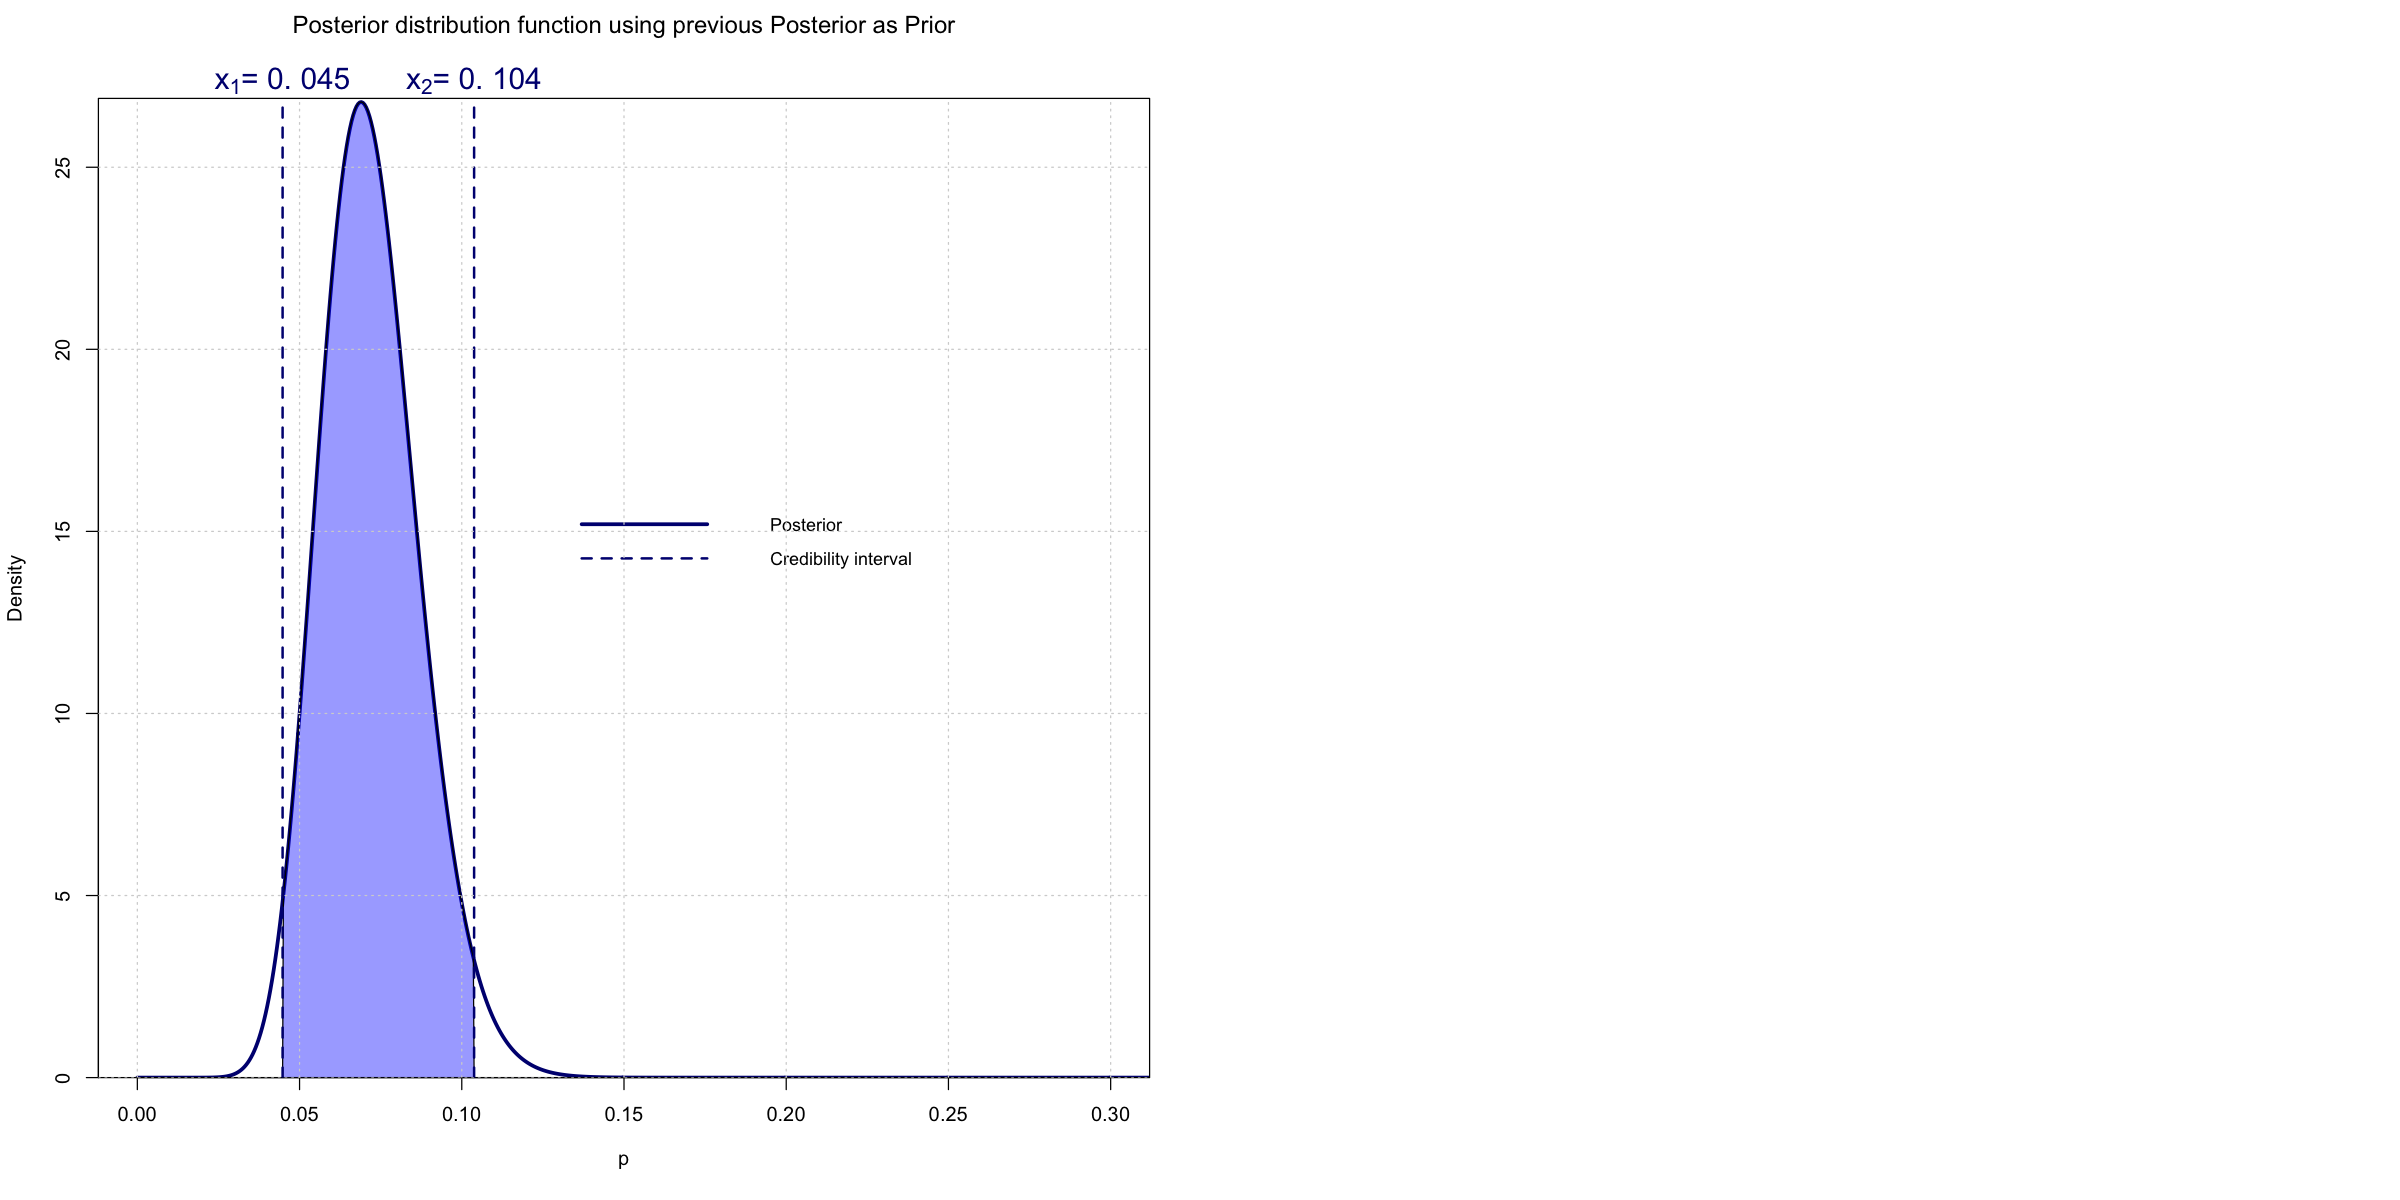

In [28]:
# Posterior mean computed with the Beta Prior
m <-  delta.p*sum(p*new.post)
# Bayesian estimator 
p.B <- m
# Posterior variance
var.B <- delta.p*sum((p**2)*new.post) - (delta.p*sum(p*new.post))**2

cat("The bayesian estimator is:   p_B      =",p.B,'\n')
cat("The posterior mean value is: m        =",m,'\n')
cat("The posterior variance is:   Var[p_B] =",var.B,'\n')


# Evaluate 95% credibility interval for Beta Posterior 

new.area <- delta.p*cumsum(new.post)

cl = 0.95 # Confidence level

cl.func <- function(p,cumsum.area,cl) {
            x1 <- NULL
            x2 <- NULL
            for(i in 1:(length(cumsum.area)-1)){
                cl1 <- (1-cl)/2
                cl2 <- cl+(1-cl)/2
                if ( (cumsum.area[i+1]>= cl1) & (cumsum.area[i] <= cl1)) {
                    x1 <- (p[i]+p[i+1])/2
                }
                if ( (cumsum.area[i+1]>= cl2) & (cumsum.area[i] <= cl2)) {
                    x2 <- (p[i]+p[i+1])/2
                }            
            }
            return(c(x1,x2))
           }

x.new <- cl.func(p,new.area,cl)

cat('\n\n')
cat("Beta Posterior (Beta Prior)  :\t", 'x1=', x.new[1],'\tx2=', x.new[2],'\n')


# PLOT
# set the size and position of the plots
par(mfrow=c(1,2))
options(repr.plot.width=20, repr.plot.height=10)

# Beta Posterior
plot(p, new.post, xaxs='r', yaxs='i', col='navy', type='l', ylim=c(0,max(new.post)+0.1), xlim=c(0,0.3),
     lty=1, lwd = 3, xlab=TeX(sprintf("$p$")), ylab='Density')

title(TeX(sprintf("Posterior distribution function using previous Posterior as Prior")),line=3)
x = x.new

xp <- c(x[1],p[p>x[1] & p<x[2]],x[2])
yp <- c(0,new.post[which(p>x[1] & p<x[2])],0)
polygon(x = xp, y = yp, col = rgb(red = 0, green = 0, blue = 1, alpha = 0.4))

abline(v=x[1], lty=2,col='navy',lwd=2)
abline(v=x[2], lty=2,col='navy',lwd=2)

text(x[1], par("usr")[4] + 1.08, labels = TeX(sprintf("$x_1$= %0.3f",x[1])), pos=1, cex=1.5, col="navy", xpd=TRUE)
text(x[2], par("usr")[4] + 1.08, labels = TeX(sprintf("$x_2$= %0.3f",x[2])), pos=1, cex=1.5, col="navy", xpd=TRUE)

legend("topleft", inset=0.4,legend=c("Posterior","Credibility interval"),
       col=c("navy","navy"), lty=c(1,2), lwd=c(3,2), cex=0.9,box.lty=0)

grid()

#### Comparison

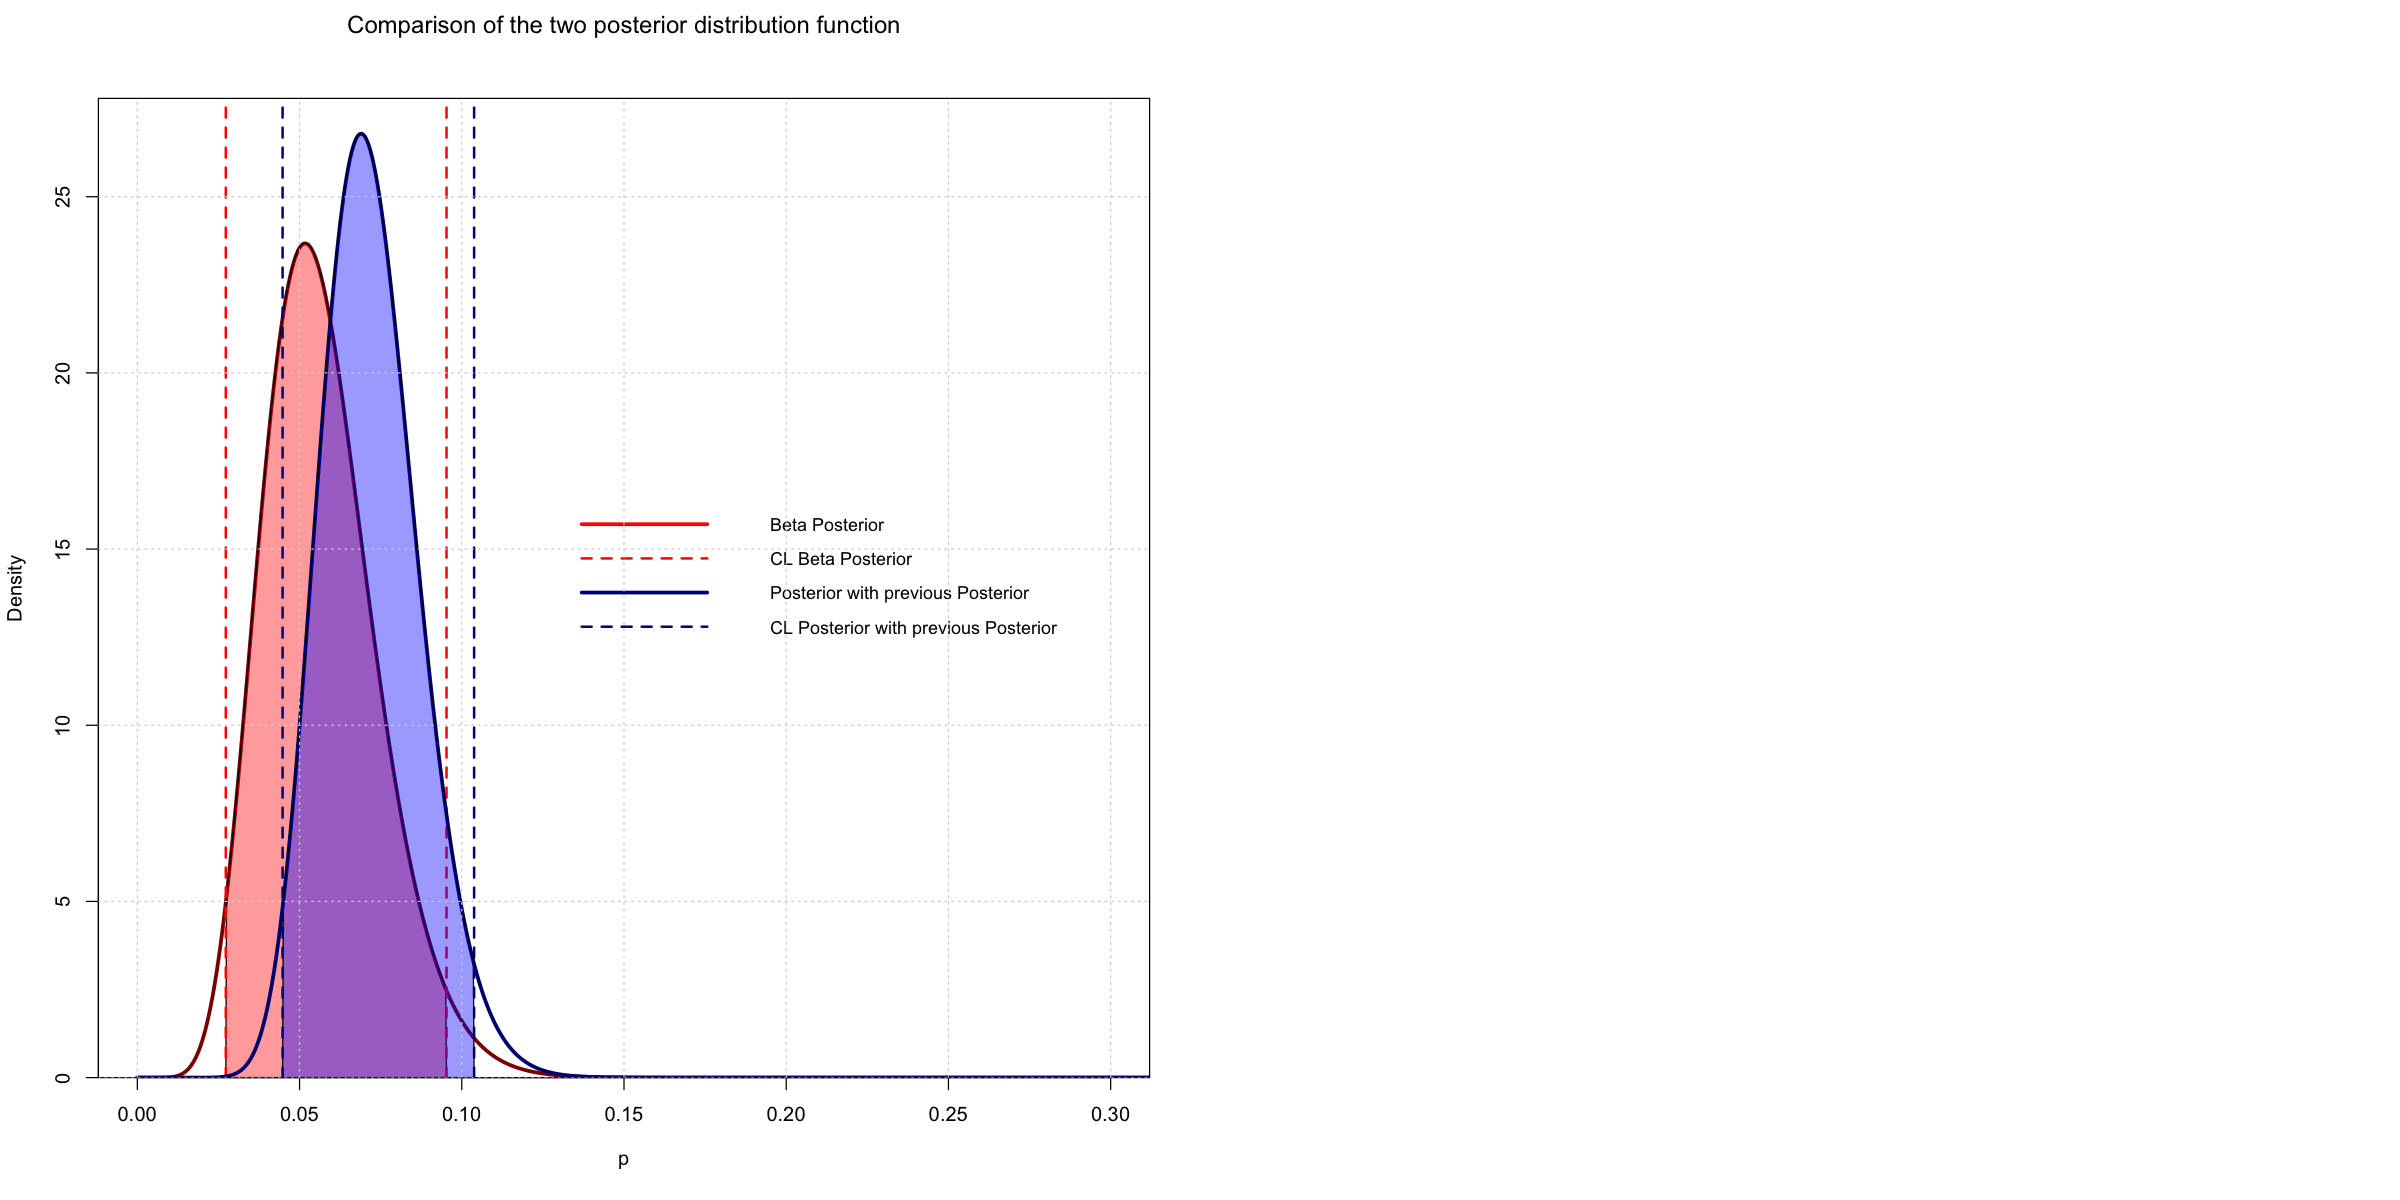

In [29]:
# COMPARISON PLOT
# set the size and position of the plots
par(mfrow=c(1,2))
options(repr.plot.width=20, repr.plot.height=10)

# Beta Posterior
plot(p, beta.post, xaxs='r', yaxs='i', col='darkred', type='l', ylim=c(0,max(beta.post,new.post)+1), xlim=c(0,0.3),
     lty=1, lwd = 3, xlab=TeX(sprintf("$p$")), ylab='Density')

title(TeX(sprintf("Comparison of the two posterior distribution function")),line=3)

x = x.beta
xp <- c(x[1],p[p>x[1] & p<x[2]],x[2])
yp <- c(0,beta.post[which(p>x[1] & p<x[2])],0)
polygon(x = xp, y = yp, col = rgb(red = 1, green = 0, blue = 0, alpha = 0.4))

abline(v=x[1], lty=2,col='red', lwd=2)
abline(v=x[2], lty=2,col='red', lwd=2)

# Beta Posterior

lines(p, new.post, xaxs='r', yaxs='i', col='navy', type='l', ylim=c(0,max(new.post)+0.1),
     lty=1, lwd = 3, xlab=TeX(sprintf("$p$")), ylab='Density')

x = x.new

xp <- c(x[1],p[p>x[1] & p<x[2]],x[2])
yp <- c(0,new.post[which(p>x[1] & p<x[2])],0)
polygon(x = xp, y = yp, col = rgb(red = 0, green = 0, blue = 1, alpha = 0.4))

abline(v=x[1], lty=2,col='navy',lwd=2)
abline(v=x[2], lty=2,col='navy',lwd=2)

legend("topleft", inset=0.4,legend=c("Beta Posterior","CL Beta Posterior","Posterior with previous Posterior","CL Posterior with previous Posterior"),
       col=c("red","red","navy","navy"), lty=c(1,2,1,2), lwd=c(3,2), cex=0.9,box.lty=0)

grid()

### H) test the hypotesis $H_0: p=0.1 \text{ versus } H_1: p \neq 0.1 $ at 5% level of significance with both the frequentist and bayesian approach

#### Frequentist approach

In [30]:
# Probability of null hypotesis
p.hyp <- 0.1
y <- 0:n

# Null hyphotesis
null.hyp <- dbinom(y,size=n,prob=p.hyp)

cum.sum <- cumsum(null.hyp)

In [31]:
cl.discrete.func <- function(p,cumsum.area,cl) {
            x1 <- NULL
            x2 <- NULL
            for(i in 1:(length(cumsum.area)-1)){
                cl1 <- (1-cl)/2
                cl2 <- cl+(1-cl)/2
                if ( (cumsum.area[i+1]>= cl1) & (cumsum.area[i] <= cl1)) {
                    x1 <-  p[i] # rounds to the nearest integer that’s smaller than x
                    area.1 <- cumsum.area[i]
                }
                if ( (cumsum.area[i+1]>= cl2) & (cumsum.area[i] <= cl2)) {
                    x2 <- p[i+1] # rounds to the nearest integer that’s larger than x
                    area.2 <- 1 - cumsum.area[i+1]
                }            
            }
            return(c(x1,x2,area.1,area.2))
           }

cl = 0.95 # Confidence level
alpha = 0.025

x <- cl.discrete.func(y,cum.sum,cl)
x1 <- x[1]
x2 <- x[2]
area1 <- x[3]
area2 <- x[4]
area <- area1 + area2

cat("x1           : ", x1,'\n')
cat("x2           : ", x2,'\n')
cat("area 1       : ", area1,'\n')
cat("area 2       : ", area2,'\n')
cat("alpha        : ", area,'\n')

x1           :  8 
x2           :  24 
area 1       :  0.01290585 
area 2       :  0.0236551 
alpha        :  0.03656096 


We have obtained the interval: 

$$
\{ y \le 8 \} \cup \{ y>=24 \} \text{ with } \alpha = 0.0365
$$

We observe y=9 which lies inside the acceptance region, hence we cannot reject the hyphotesis $H_0$. Let us see it with a plot:

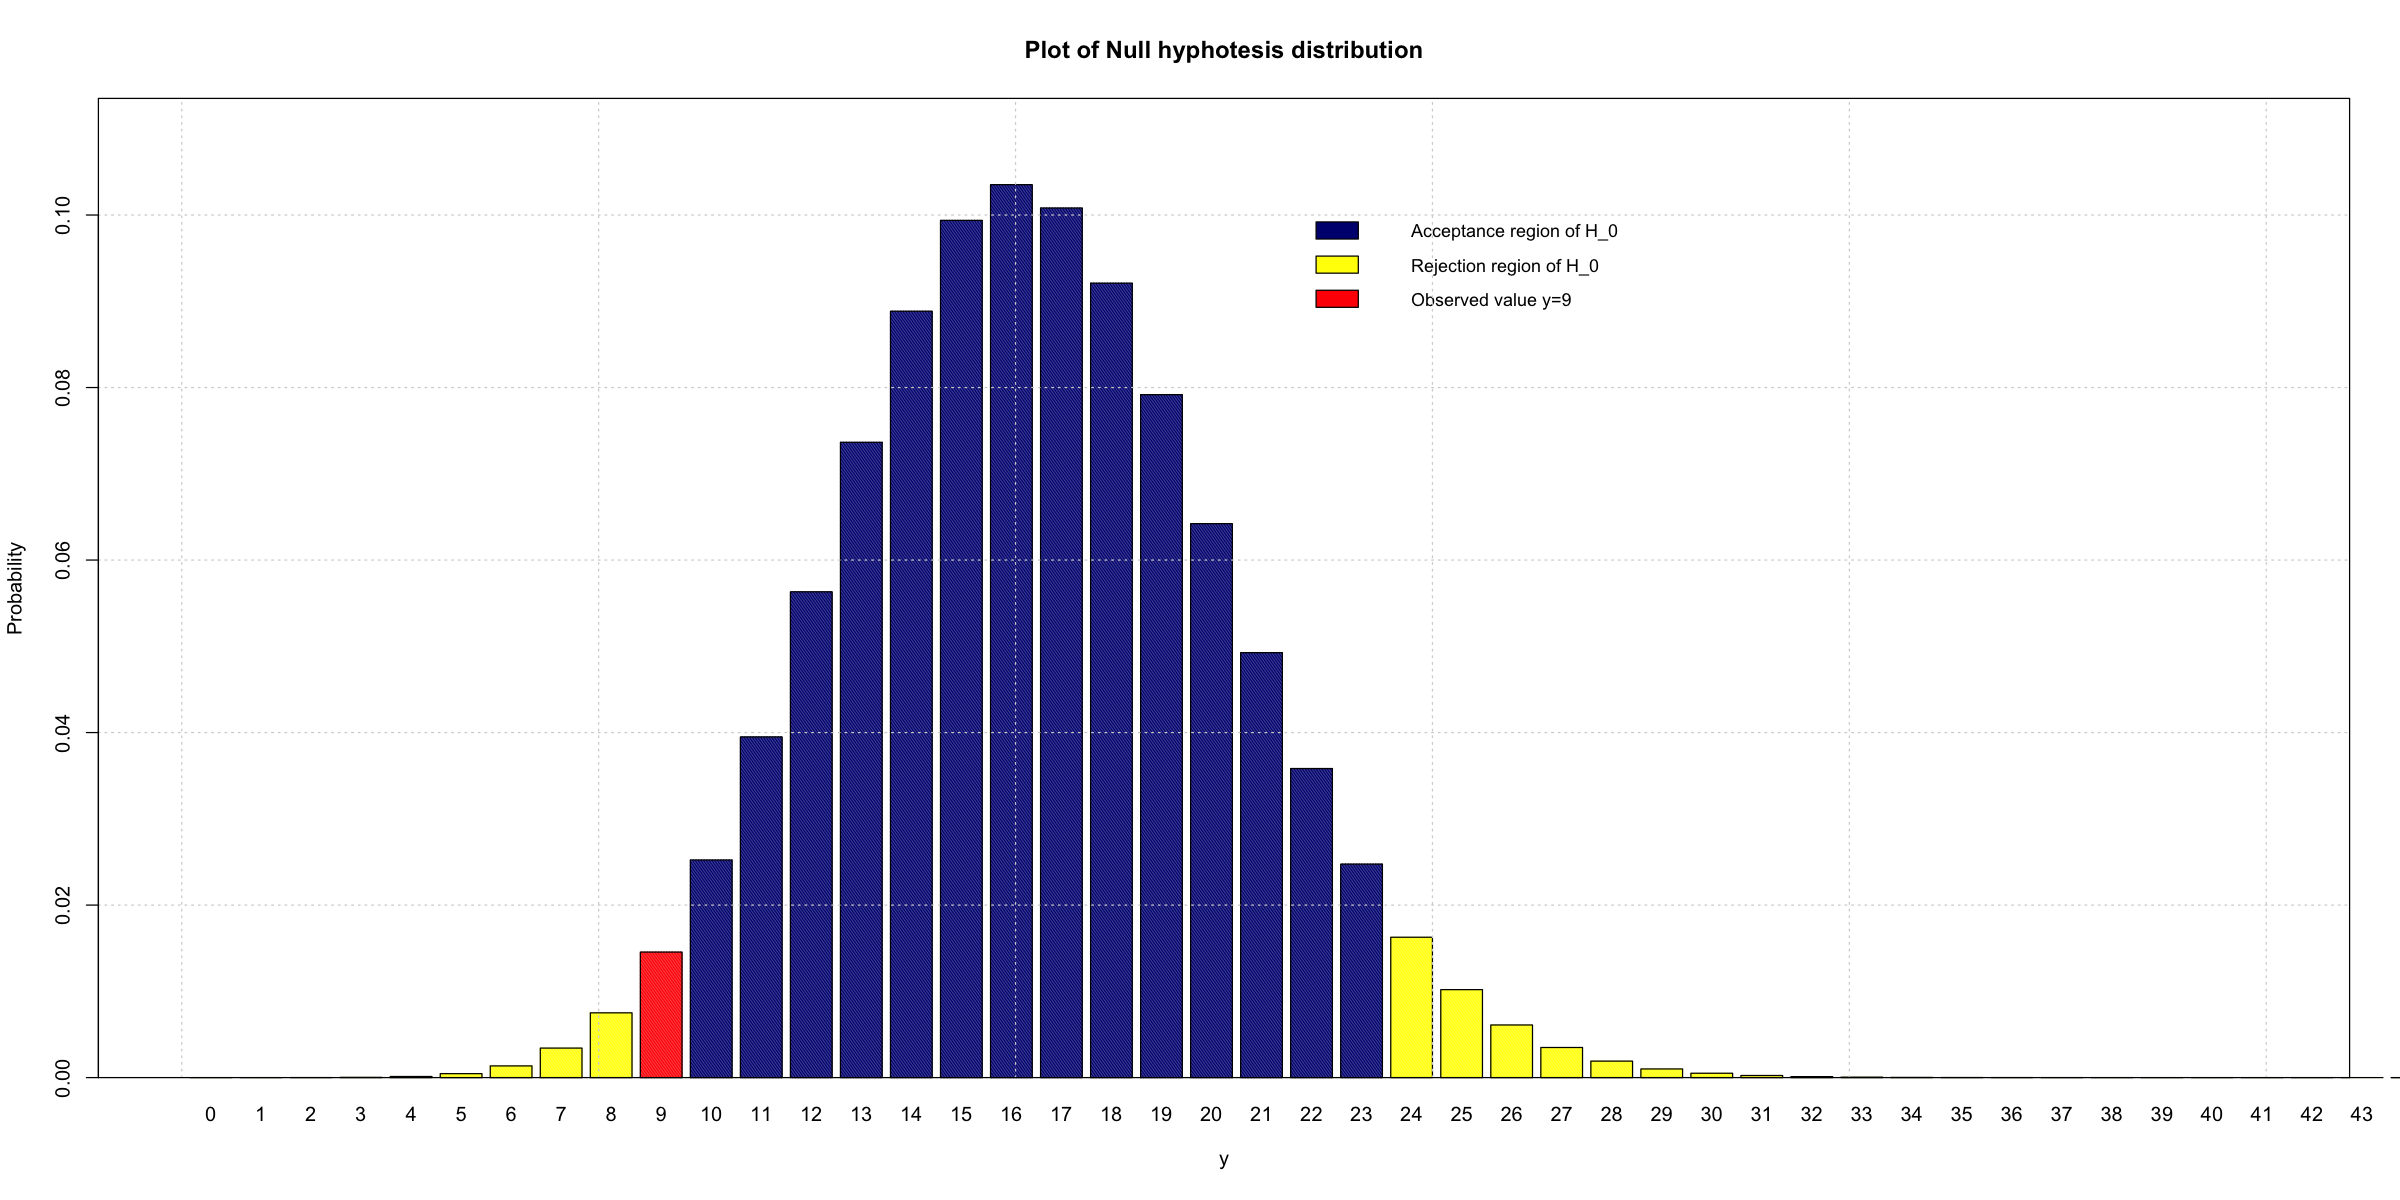

In [32]:
# set the size and position of the plots
par(mfrow=c(1,1))
options(repr.plot.width=20, repr.plot.height=10)

cols <- c("navy","yellow")
pos <- (y <=x1 | y>=x2)

# Plot Null hyphotesis
barplot(null.hyp, names=y, col=ifelse(y==9,'red',cols[pos + 1]), ylim=c(0,max(null.hyp)+0.01),density=200,
        main="Plot of Null hyphotesis distribution", xlim=c(0,50),
        xlab=TeX(sprintf("$y$")), ylab='Probability')

legend("topright", inset=+0.1,legend=c("Acceptance region of H_0","Rejection region of H_0","Observed value y=9"),
       fill=c("navy","yellow","red"),cex=0.9,box.lty=0)

grid()
box()

#### Bayesian approach

##### Beta Posterior

Credibility interval for Posterior (Beta Prior)  :	 x1= 0.02726363 	x2= 0.09529765 


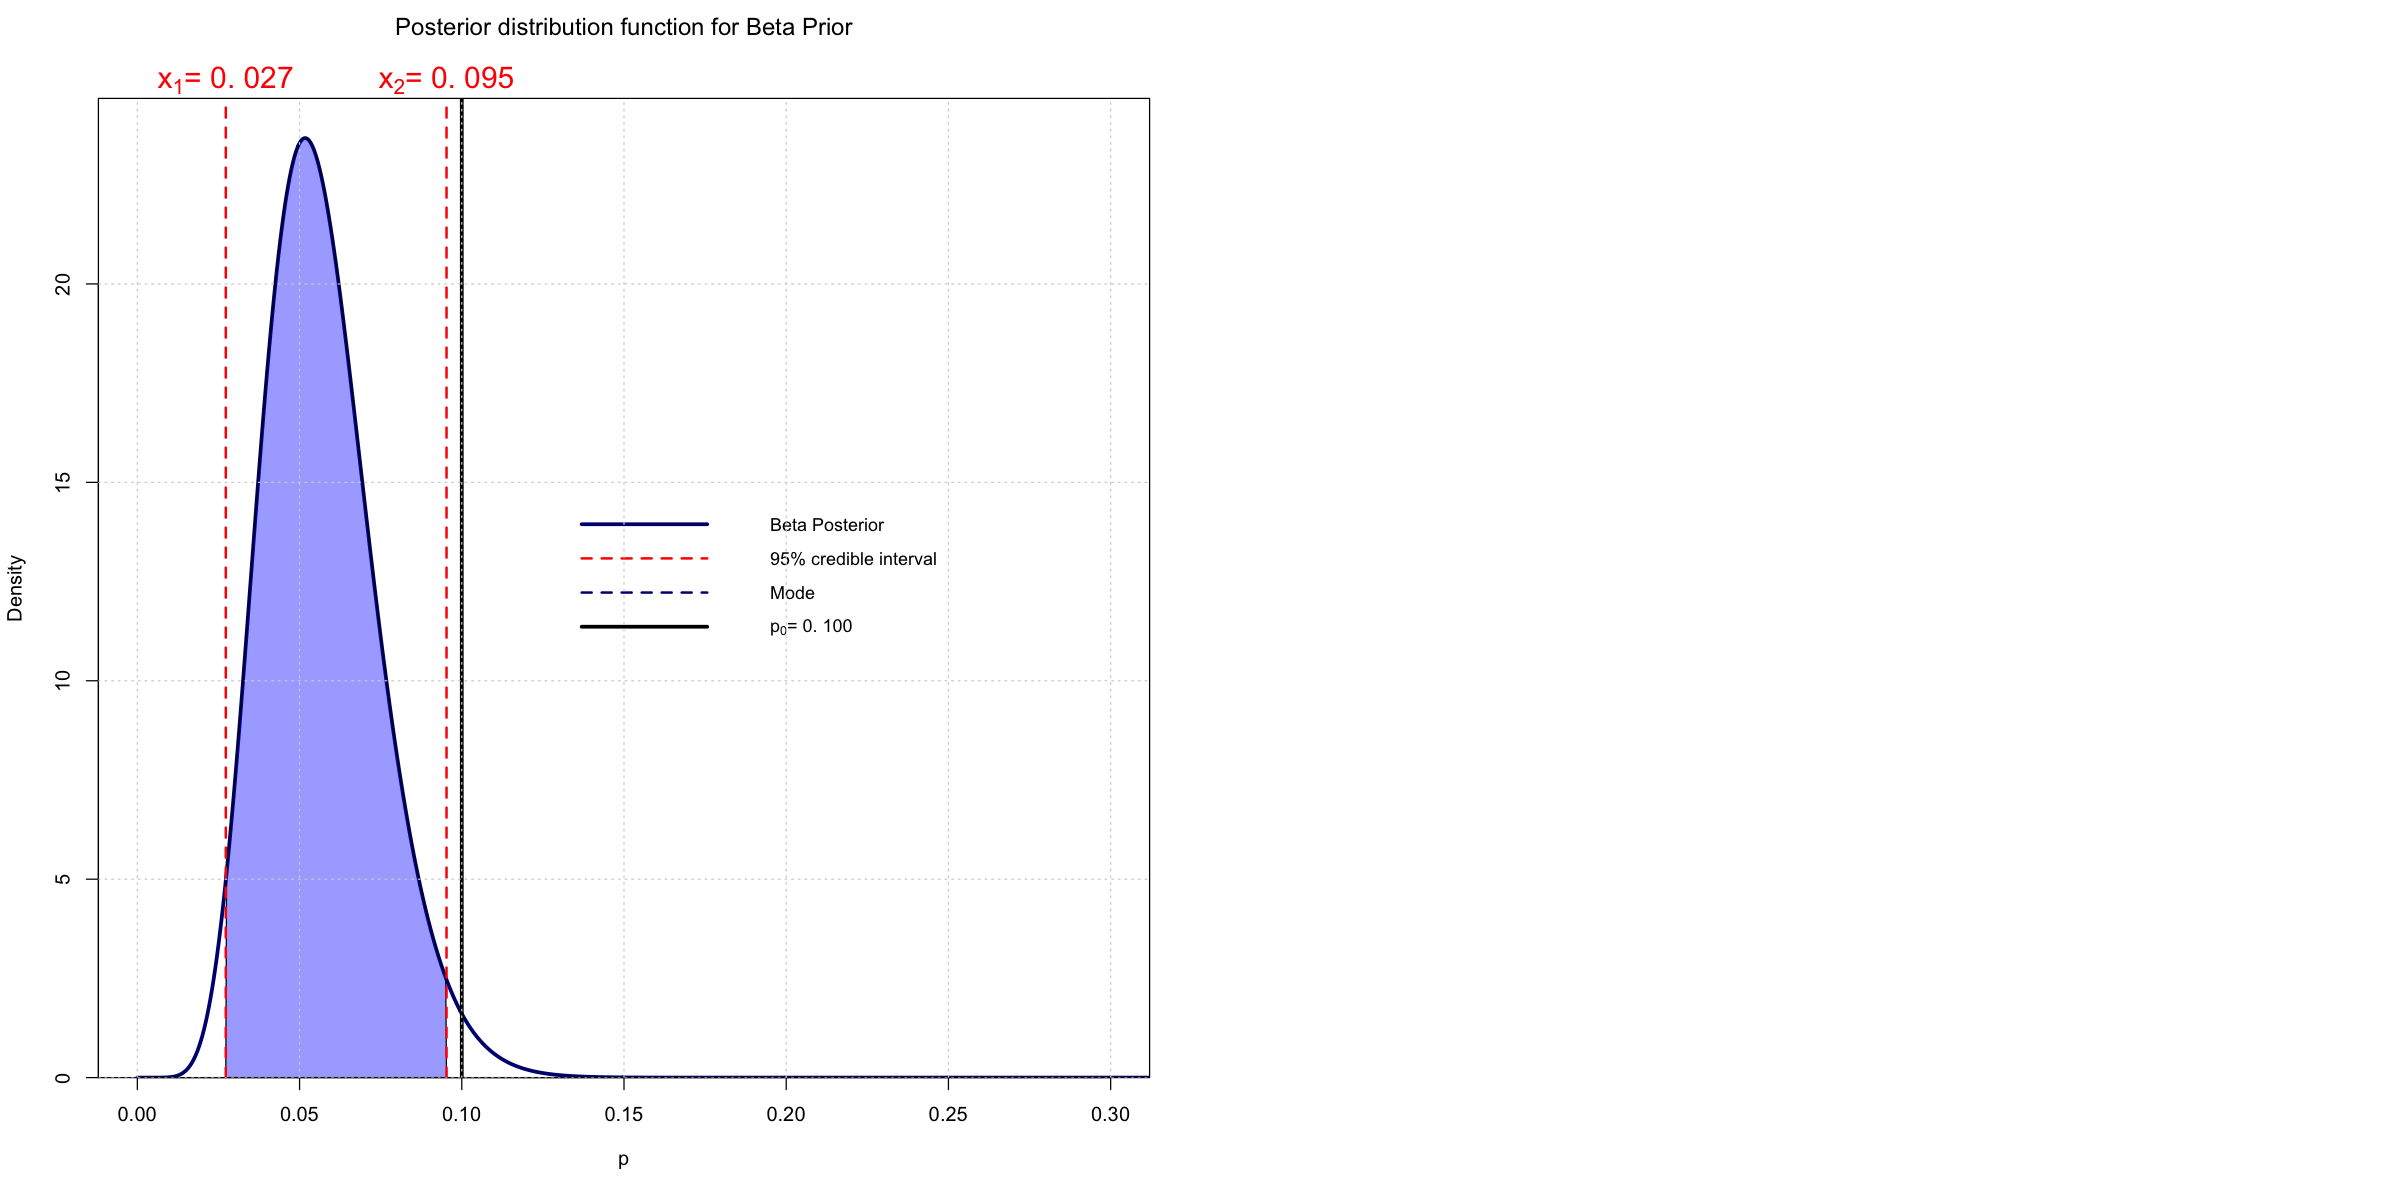

In [33]:
cat("Credibility interval for Posterior (Beta Prior)  :\t", 'x1=', x.beta[1],'\tx2=', x.beta[2],'\n')


# set the size and position of the plots
par(mfrow=c(1,2))
options(repr.plot.width=20, repr.plot.height=10)

# Beta Posterior
plot(p, beta.post, xaxs='r', yaxs='i', col='navy', type='l', ylim=c(0,max(beta.post)+1),xlim=c(0,0.3),
     lty=1, lwd = 3, xlab=TeX(sprintf("$p$")), ylab='Density')

title(TeX(sprintf("Posterior distribution function for Beta Prior")),line=3)
x = x.beta

xp <- c(x[1],p[p>x[1] & p<x[2]],x[2])
yp <- c(0,beta.post[which(p>x[1] & p<x[2])],0)
polygon(x = xp, y = yp, col = rgb(red = 0, green = 0, blue = 1, alpha = 0.4))

abline(v=x[1], lty=2,col='red',lwd=2)
abline(v=x[2], lty=2,col='red',lwd=2)

abline(v=p.hyp, lty=1,col='black',lwd=3)

text(x[1], par("usr")[4] + 1, labels = TeX(sprintf("$x_1$= %0.3f",x[1])), pos=1, cex=1.5, col="red", xpd=TRUE)
text(x[2], par("usr")[4] + 1, labels = TeX(sprintf("$x_2$= %0.3f",x[2])), pos=1, cex=1.5, col="red", xpd=TRUE)

legend("topleft", inset=+0.4,legend=c("Beta Posterior","95% credible interval","Mode",TeX(sprintf("$p_0$= %0.3f",p.hyp))),
       col=c("navy","red","navy","black"), lty=c(1,2,2,1), lwd=c(3,2,2,3),cex=0.9,box.lty=0)

grid()

The value of $p_0=0.1$ lies outside the 95% credible interval, hence we reject the null hyphotesis $H_0$.

##### Previous Posterior as new prior

Credibility interval for Posterior (Previous Posterior as new prior)  :	 x1= 0.04477239 	x2= 0.1038019 


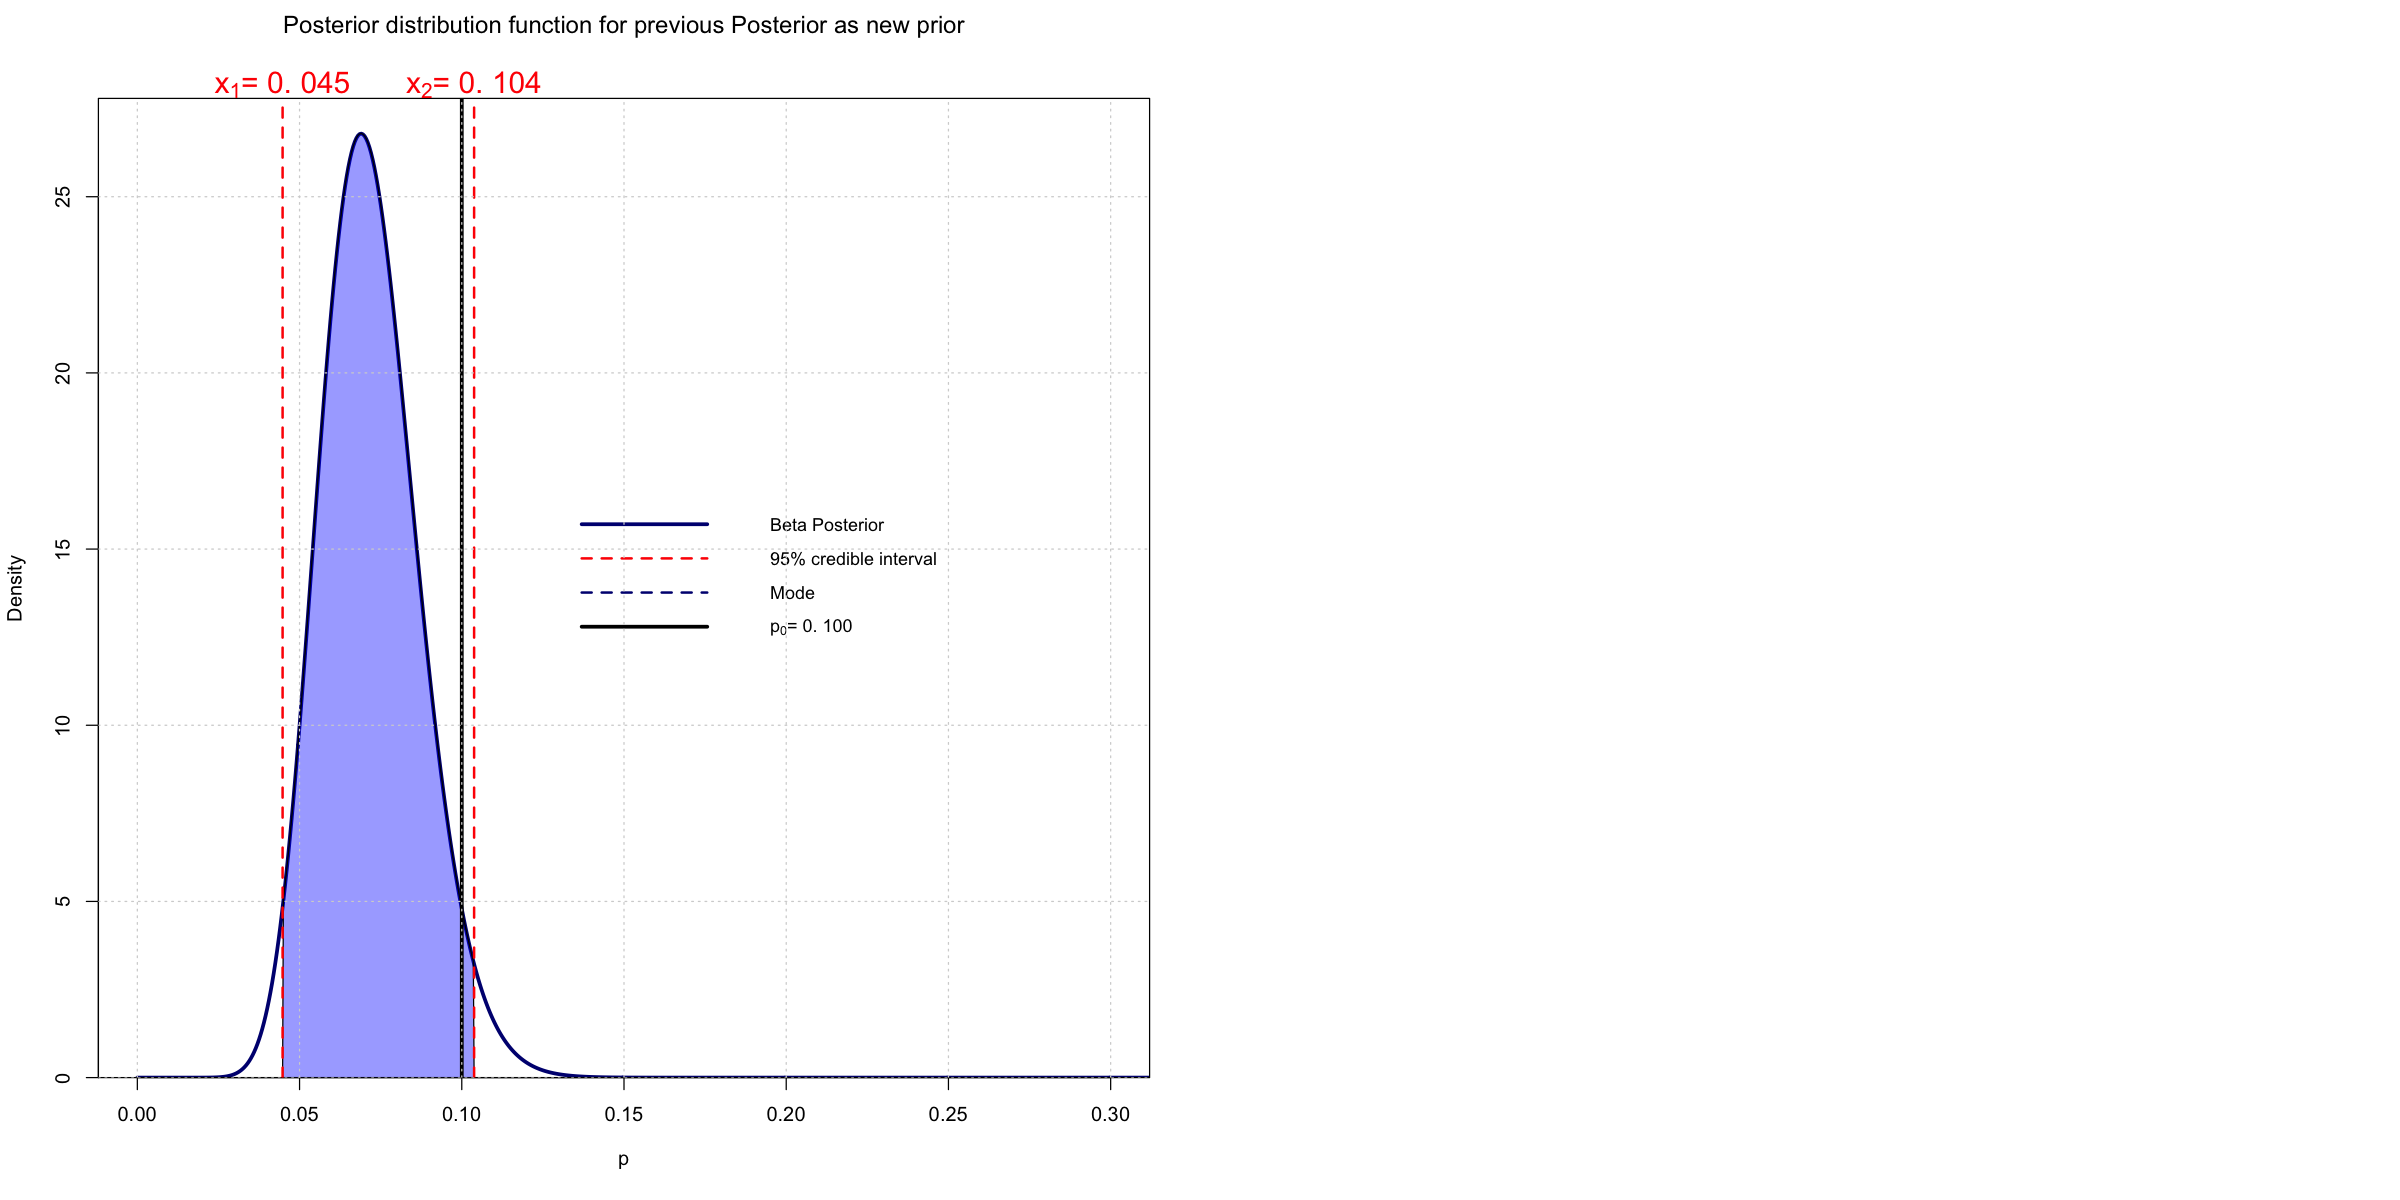

In [34]:
cat("Credibility interval for Posterior (Previous Posterior as new prior)  :\t", 'x1=', x.new[1],'\tx2=', x.new[2],'\n')


# set the size and position of the plots
par(mfrow=c(1,2))
options(repr.plot.width=20, repr.plot.height=10)

# Beta Posterior
plot(p, new.post, xaxs='r', yaxs='i', col='navy', type='l', ylim=c(0,max(new.post)+1), xlim=c(0,0.3),
     lty=1, lwd = 3, xlab=TeX(sprintf("$p$")), ylab='Density')

title(TeX(sprintf("Posterior distribution function for previous Posterior as new prior")),line=3)
x = x.new

xp <- c(x[1],p[p>x[1] & p<x[2]],x[2])
yp <- c(0,new.post[which(p>x[1] & p<x[2])],0)
polygon(x = xp, y = yp, col = rgb(red = 0, green = 0, blue = 1, alpha = 0.4))

abline(v=x[1], lty=2,col='red',lwd=2)
abline(v=x[2], lty=2,col='red',lwd=2)

abline(v=p.hyp, lty=1,col='black',lwd=3)

text(x[1], par("usr")[4] + 1, labels = TeX(sprintf("$x_1$= %0.3f",x[1])), pos=1, cex=1.5, col="red", xpd=TRUE)
text(x[2], par("usr")[4] + 1, labels = TeX(sprintf("$x_2$= %0.3f",x[2])), pos=1, cex=1.5, col="red", xpd=TRUE)

legend("topleft", inset=+0.4,legend=c("Beta Posterior","95% credible interval","Mode",TeX(sprintf("$p_0$= %0.3f",p.hyp))),
       col=c("navy","red","navy","black"), lty=c(1,2,2,1), lwd=c(3,2,2,3),cex=0.9,box.lty=0)

grid()

The value of $p_0=0.1$ lies inside the 95% credible interval, hence we do not reject the null hyphotesis $H_0$.